# Group 2

- **Subash A**: 2022AC05205
- **Subramaniam A**: 2022AC05660
- **Yuvaraj Kumar**: 2022AC05048
- **Pritam Adak**: 2022ac05761
- **Abhishek**: 2022AC05243


<H1>Diabetes Dataset Analysis: Data Preprocessing, Visualization, and Feature Engineering</H1>

In [4]:
# Installing the libraries
!pip install featuretools
!pip install tidypy
!pip install --upgrade autoviz
!pip install seaborn missingno
!pip install --upgrade pandas
!pip install sweetviz
!pip install --upgrade jinja2
!pip install pylint==2.11.1

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/125.4 MB ? eta -:--:--
   ---------------------------------------- 1.0/125.4 MB 8.4 MB/s eta 0:00:15
   -- ------------------------------------- 7.3/125.4 MB 22.6 MB/s eta 0:00:06
   ---- ----------------------------------- 14.2/125.4 MB 26.9 MB/s eta 0:00:05
   ------ --------------------------------- 21.8/125.4 MB 29.2 MB/s eta 0:00:04
   --------- ------------------------------ 29.4/125.4 MB 30.5 MB/s eta 0:00:04
   ----------- ---------------------------- 36.7/125.4 MB 31.5 MB/s eta 0:00:03
   -------------- ------------------------- 44.6/125.4 MB 31.8 MB/s eta 0:00:03
   ---------------- ----------------------- 51.6/125.4 MB 32.2 MB/s eta 0:00:03
   ------------------ --------------------- 59.2/125.4 MB 32.5 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.3.0 requires xgboost>=1.7.1, but you have xgboost 1.6.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


<H2>Installing and Importing Libraries</H2>

In [5]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sweetviz as sv
import tidypy
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [6]:

# Hiding all warnings
warnings.filterwarnings('ignore')


<H2>Data Collection and Preprocessing</H2>

In [7]:
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
diabetes_df = pd.read_csv(url, names=column_names)


<H2>Handling Missing Values</H2>

In [8]:
# Inspecting the dataset
print(diabetes_df.info())
print(diabetes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0       6         148          72              35            0    33.6   
1       1          85          66              29            0   

In [9]:
# Checking for missing values
print(diabetes_df.isnull().sum())

# Replace 0 values with NaN for certain features
zero_not_accepted = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
for column in zero_not_accepted:
    diabetes_df[column] = diabetes_df[column].replace(0, np.nan)

# Imputing missing values
imputer = SimpleImputer(strategy='median')
diabetes_df[zero_not_accepted] = imputer.fit_transform(diabetes_df[zero_not_accepted])

# Verifying that there are no missing values left
print(diabetes_df.isnull().sum())

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64
pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64


<H2>Preprocessing Pipelines</H2>

In [10]:
# Defining numerical and categorical features
numerical_features = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
categorical_features = []  # No categorical features in this dataset

# Defining numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combining the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features)
    ]
)

# Splitting the data into features (X) and target (y)
X = diabetes_df.drop(columns=['outcome'])
y = diabetes_df['outcome']

# Applying the preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Preprocessed Train Data Shape:", X_train.shape)
print("Preprocessed Test Data Shape:", X_test.shape)

Preprocessed Train Data Shape: (614, 8)
Preprocessed Test Data Shape: (154, 8)


<H2>AutoEDA using Sweetviz</H2>

In [11]:
# Generating a Sweetviz report
report = sv.analyze(diabetes_df)

# Saving the report to an HTML file
report.show_html("diabetes_sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report diabetes_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<H2>AutoEDA using AutoViz</H2>

Shape of your Data Set loaded: (768, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    All variables classified into correct types.


Number of All Scatter Plots = 21


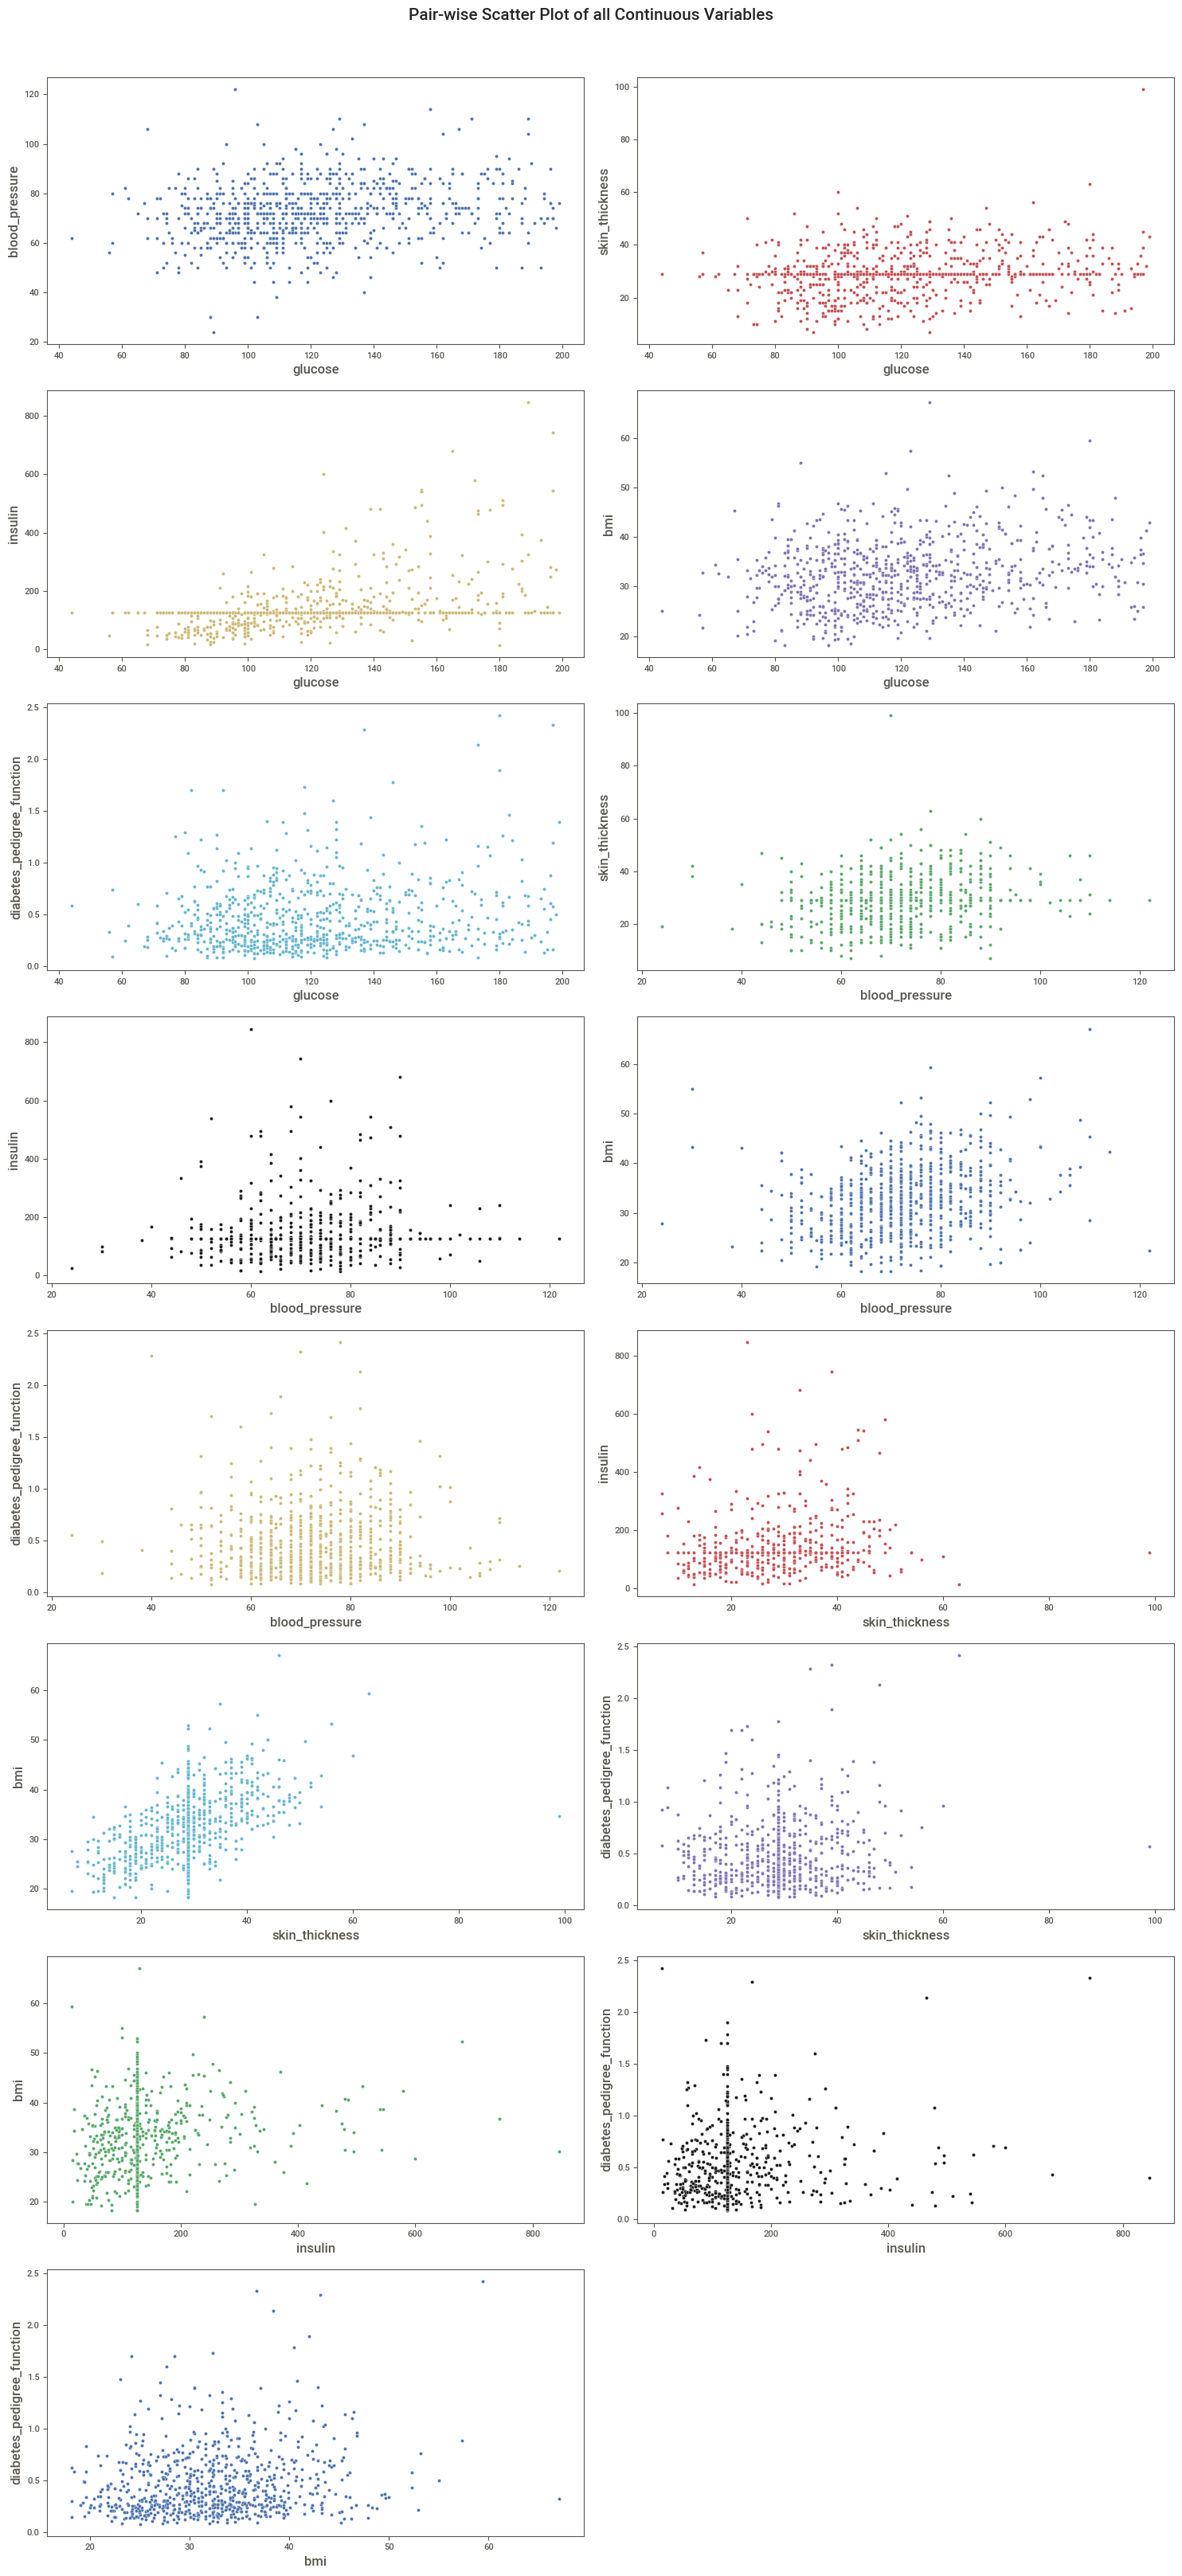

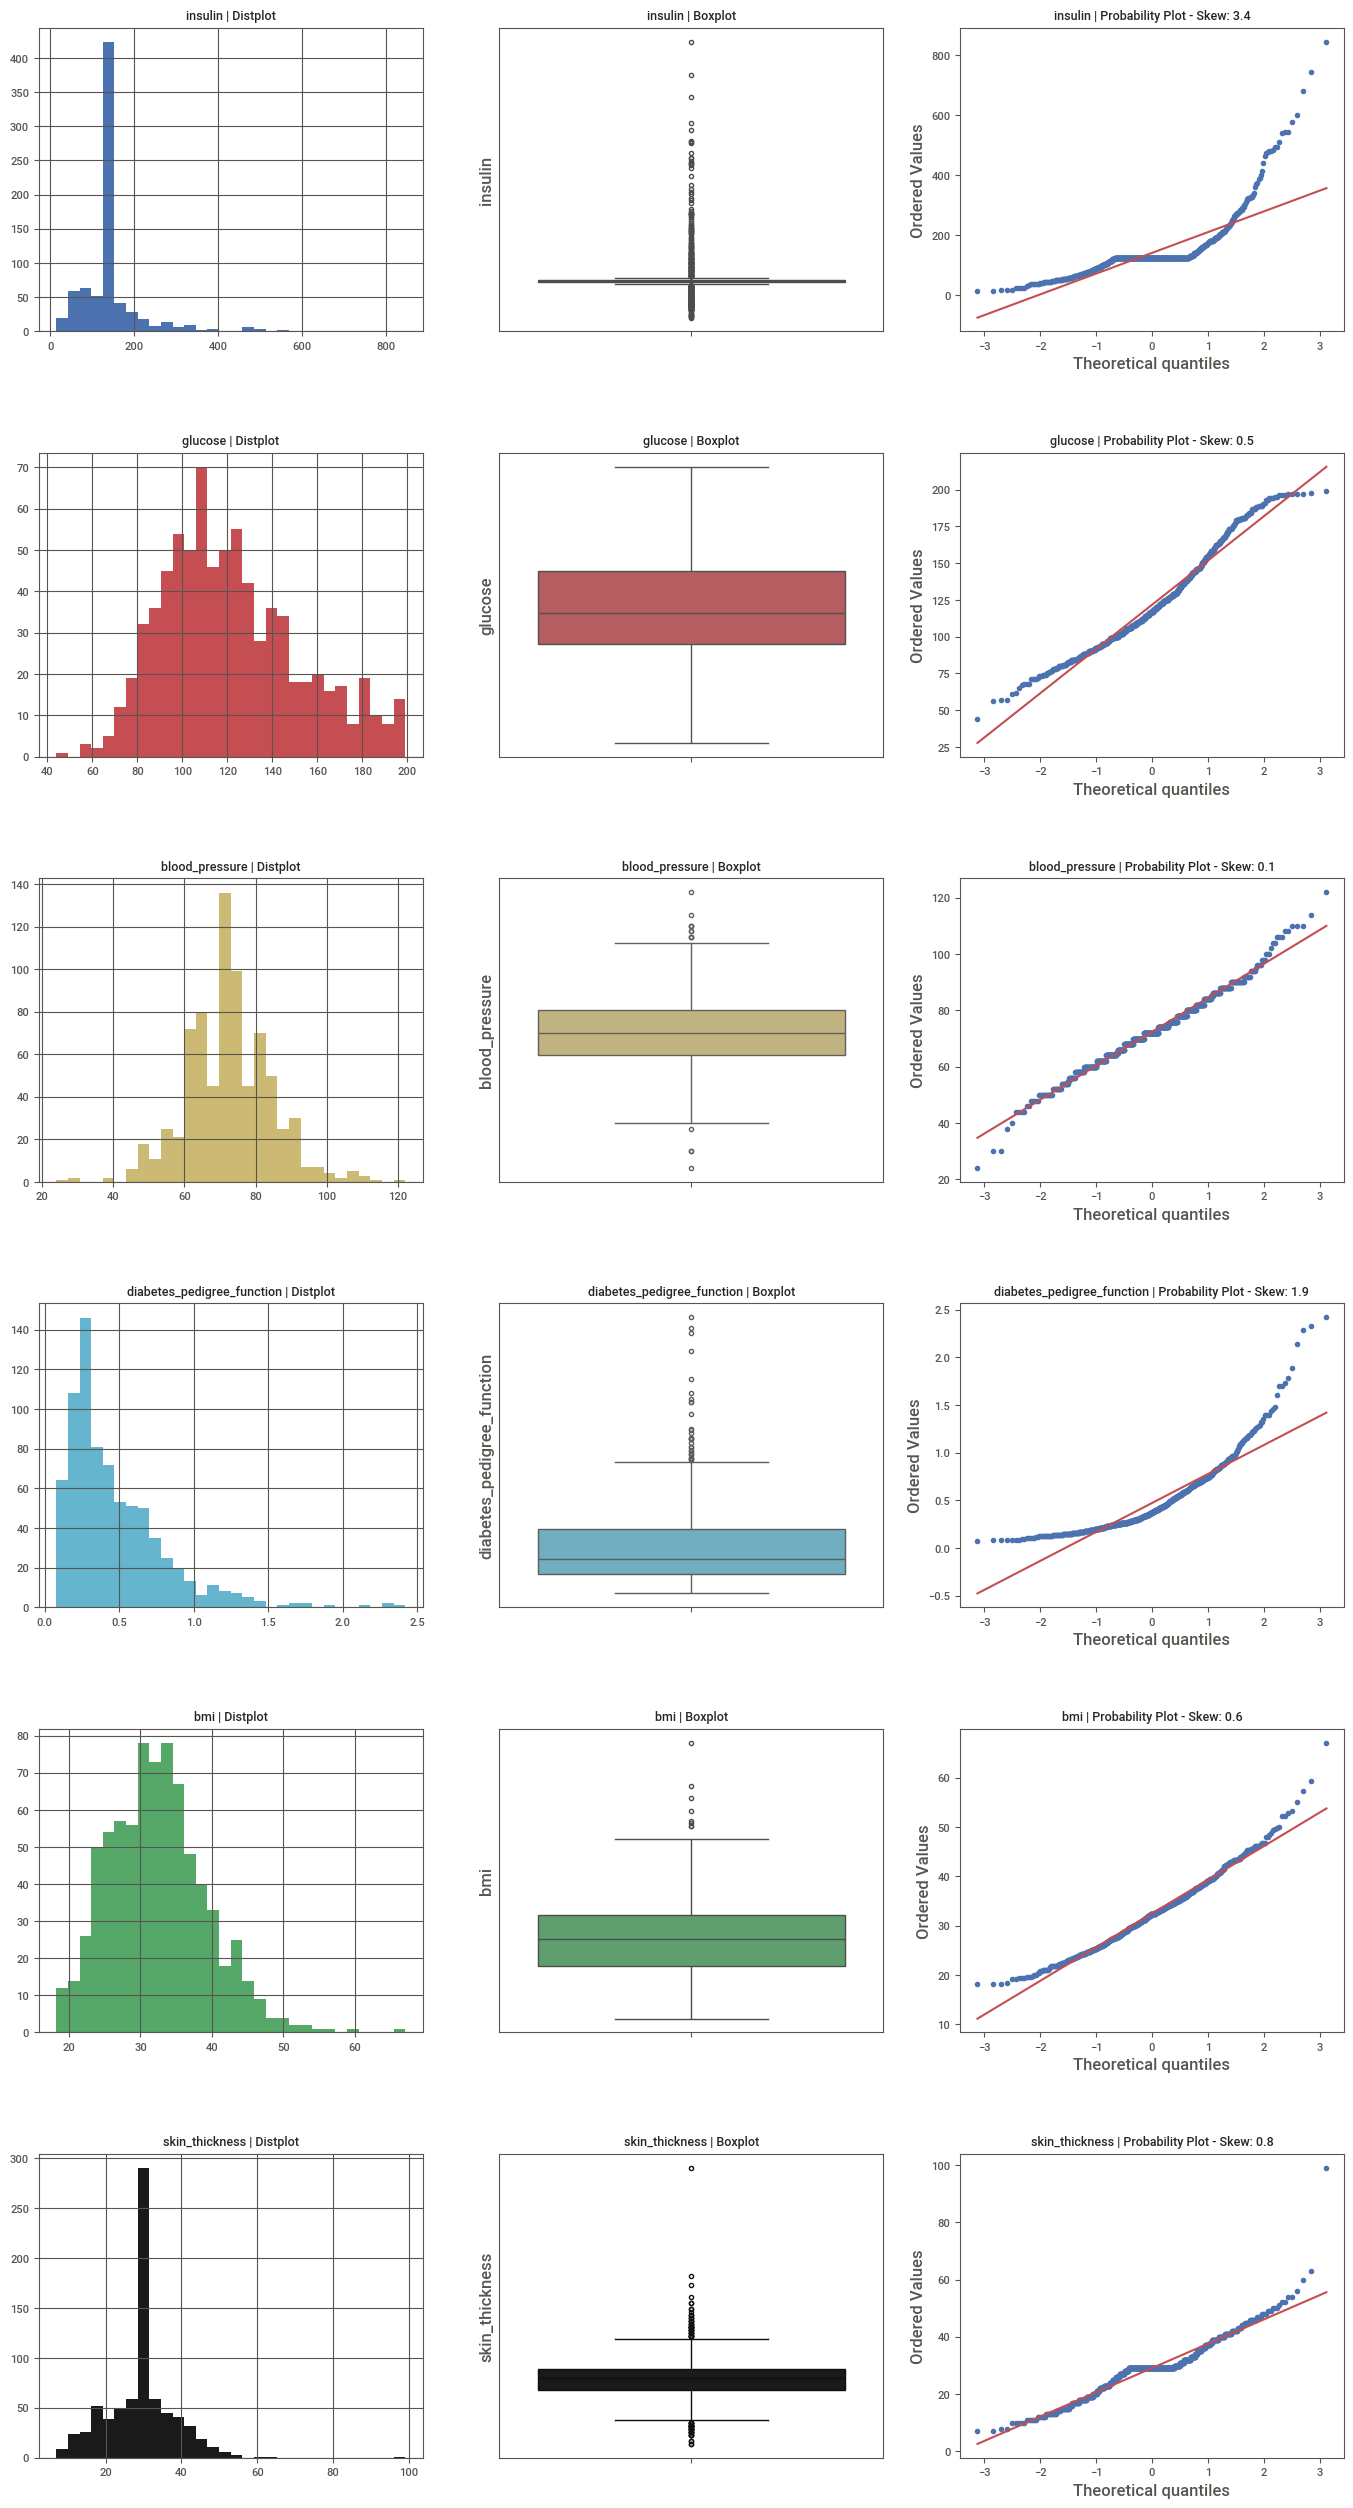

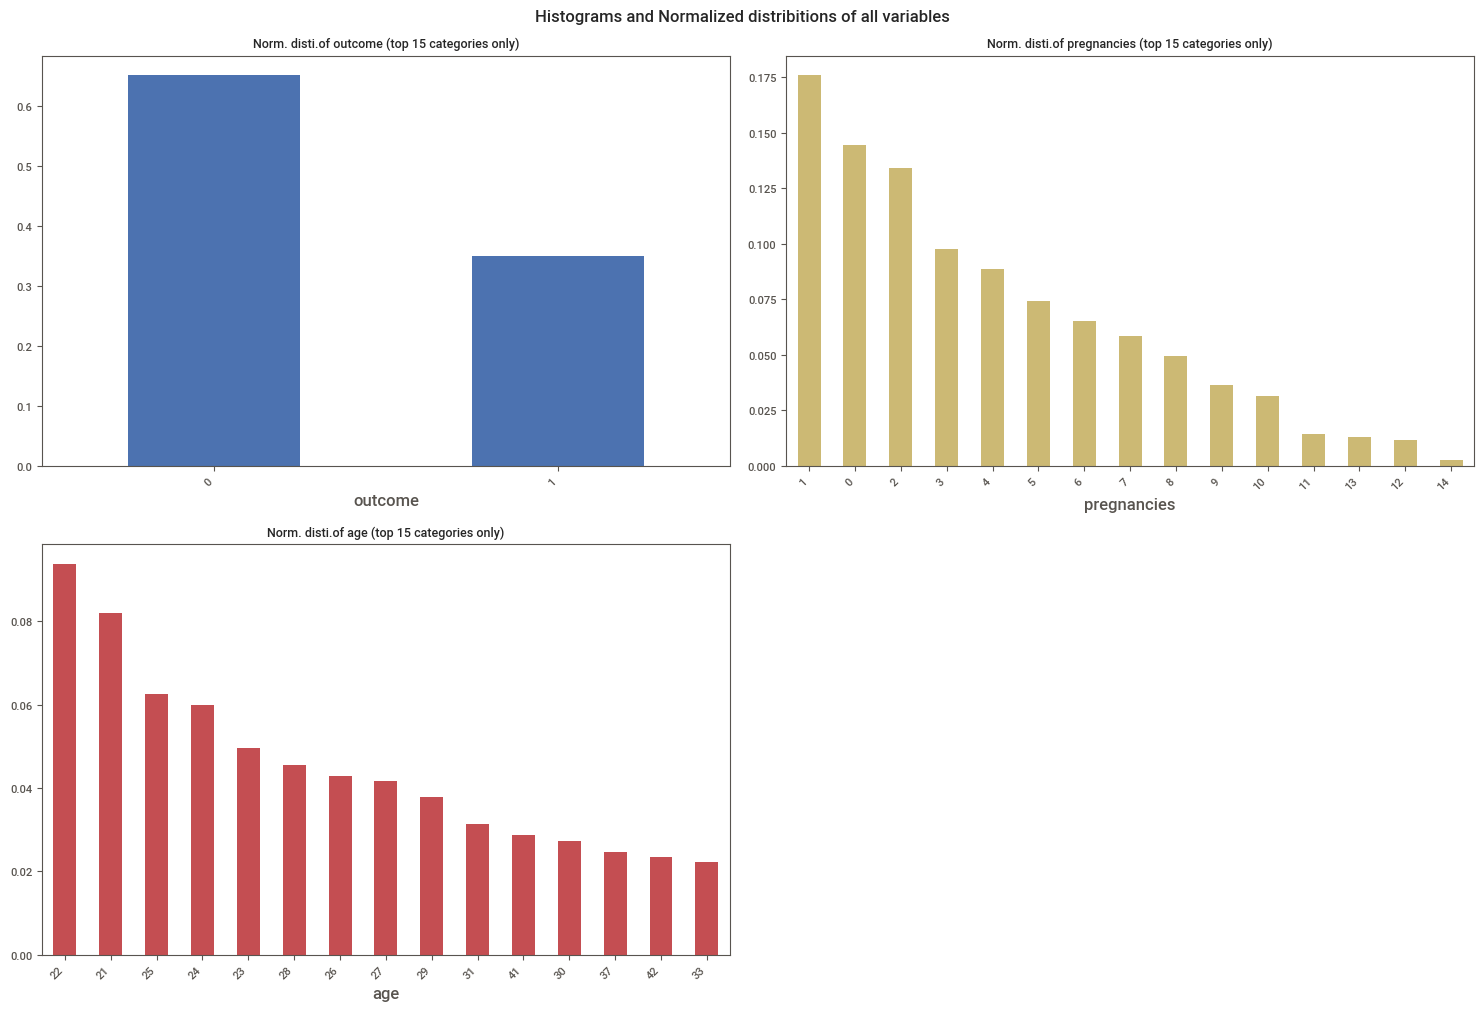

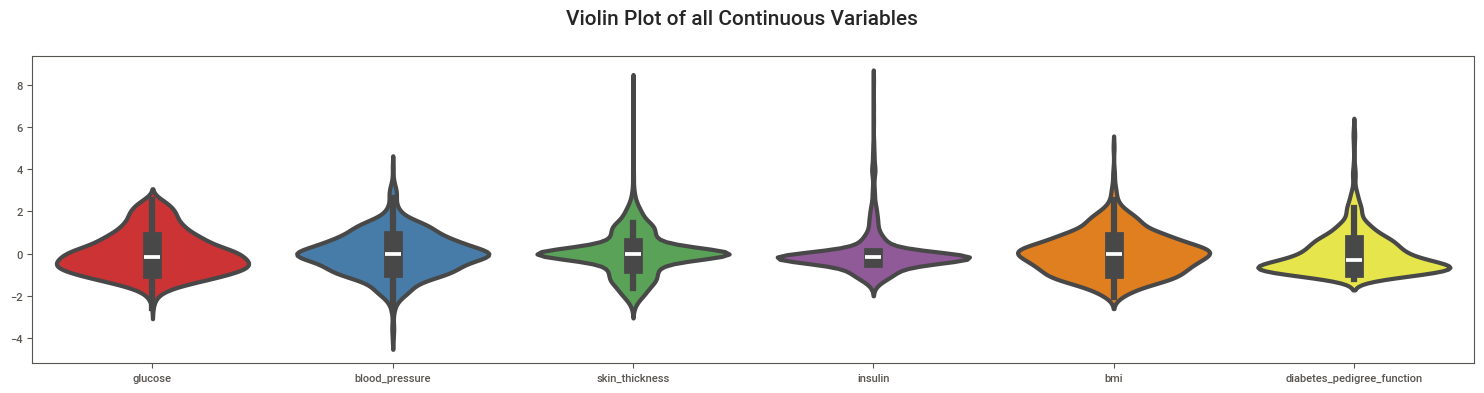

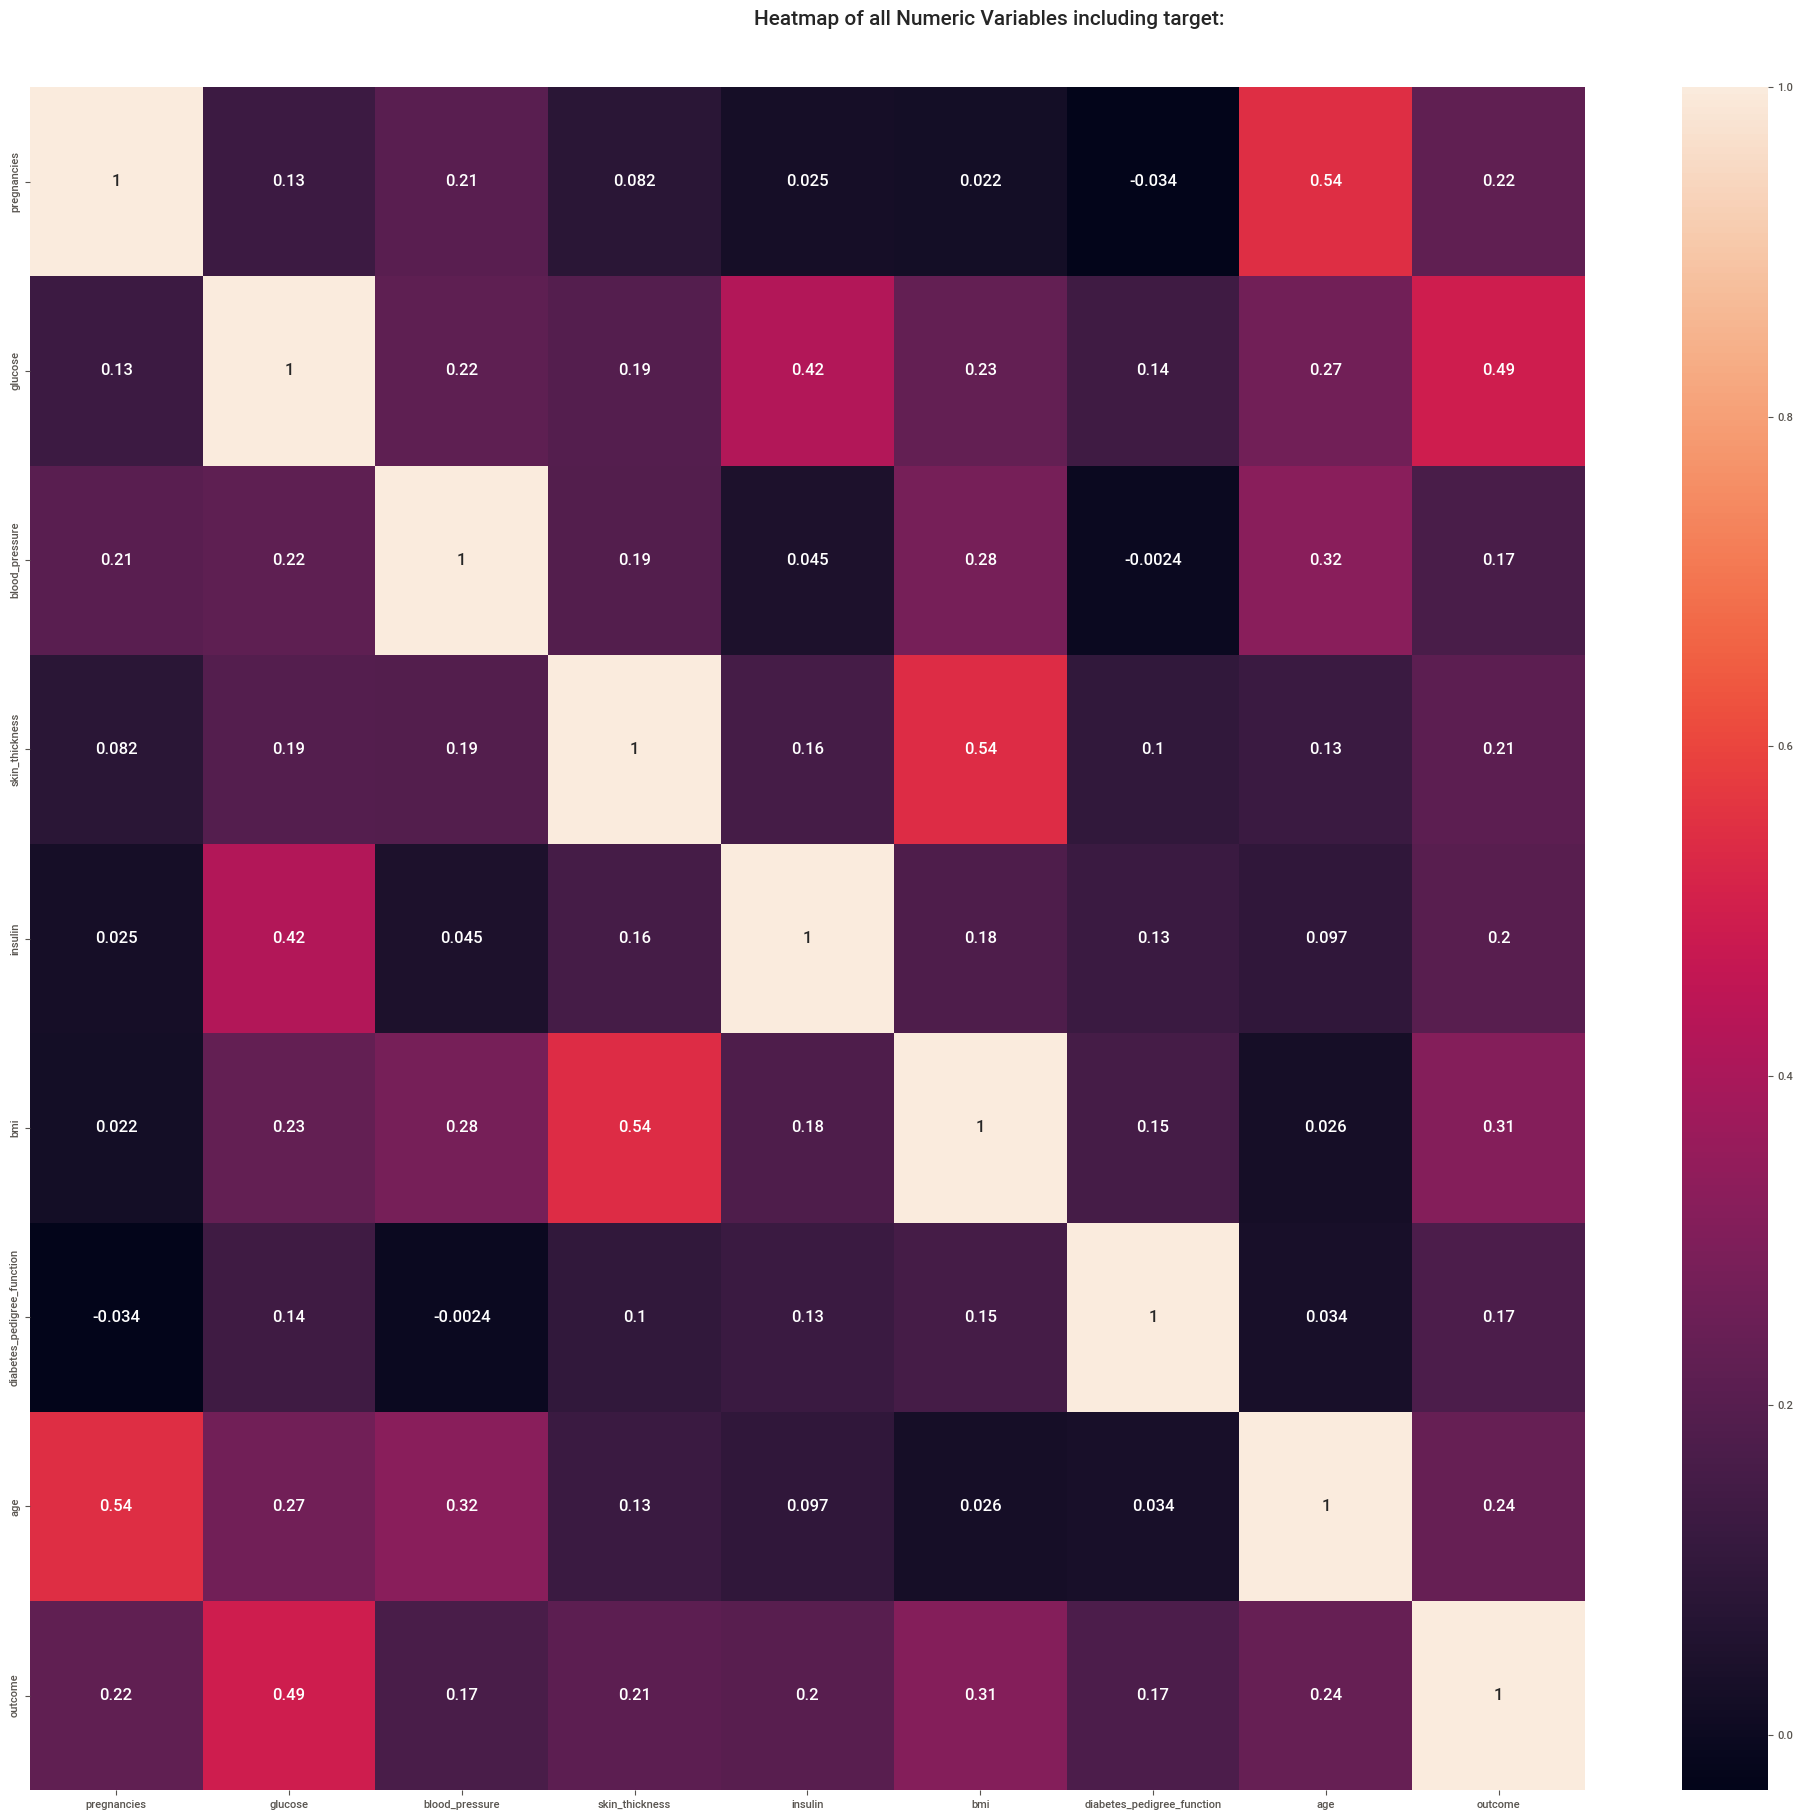

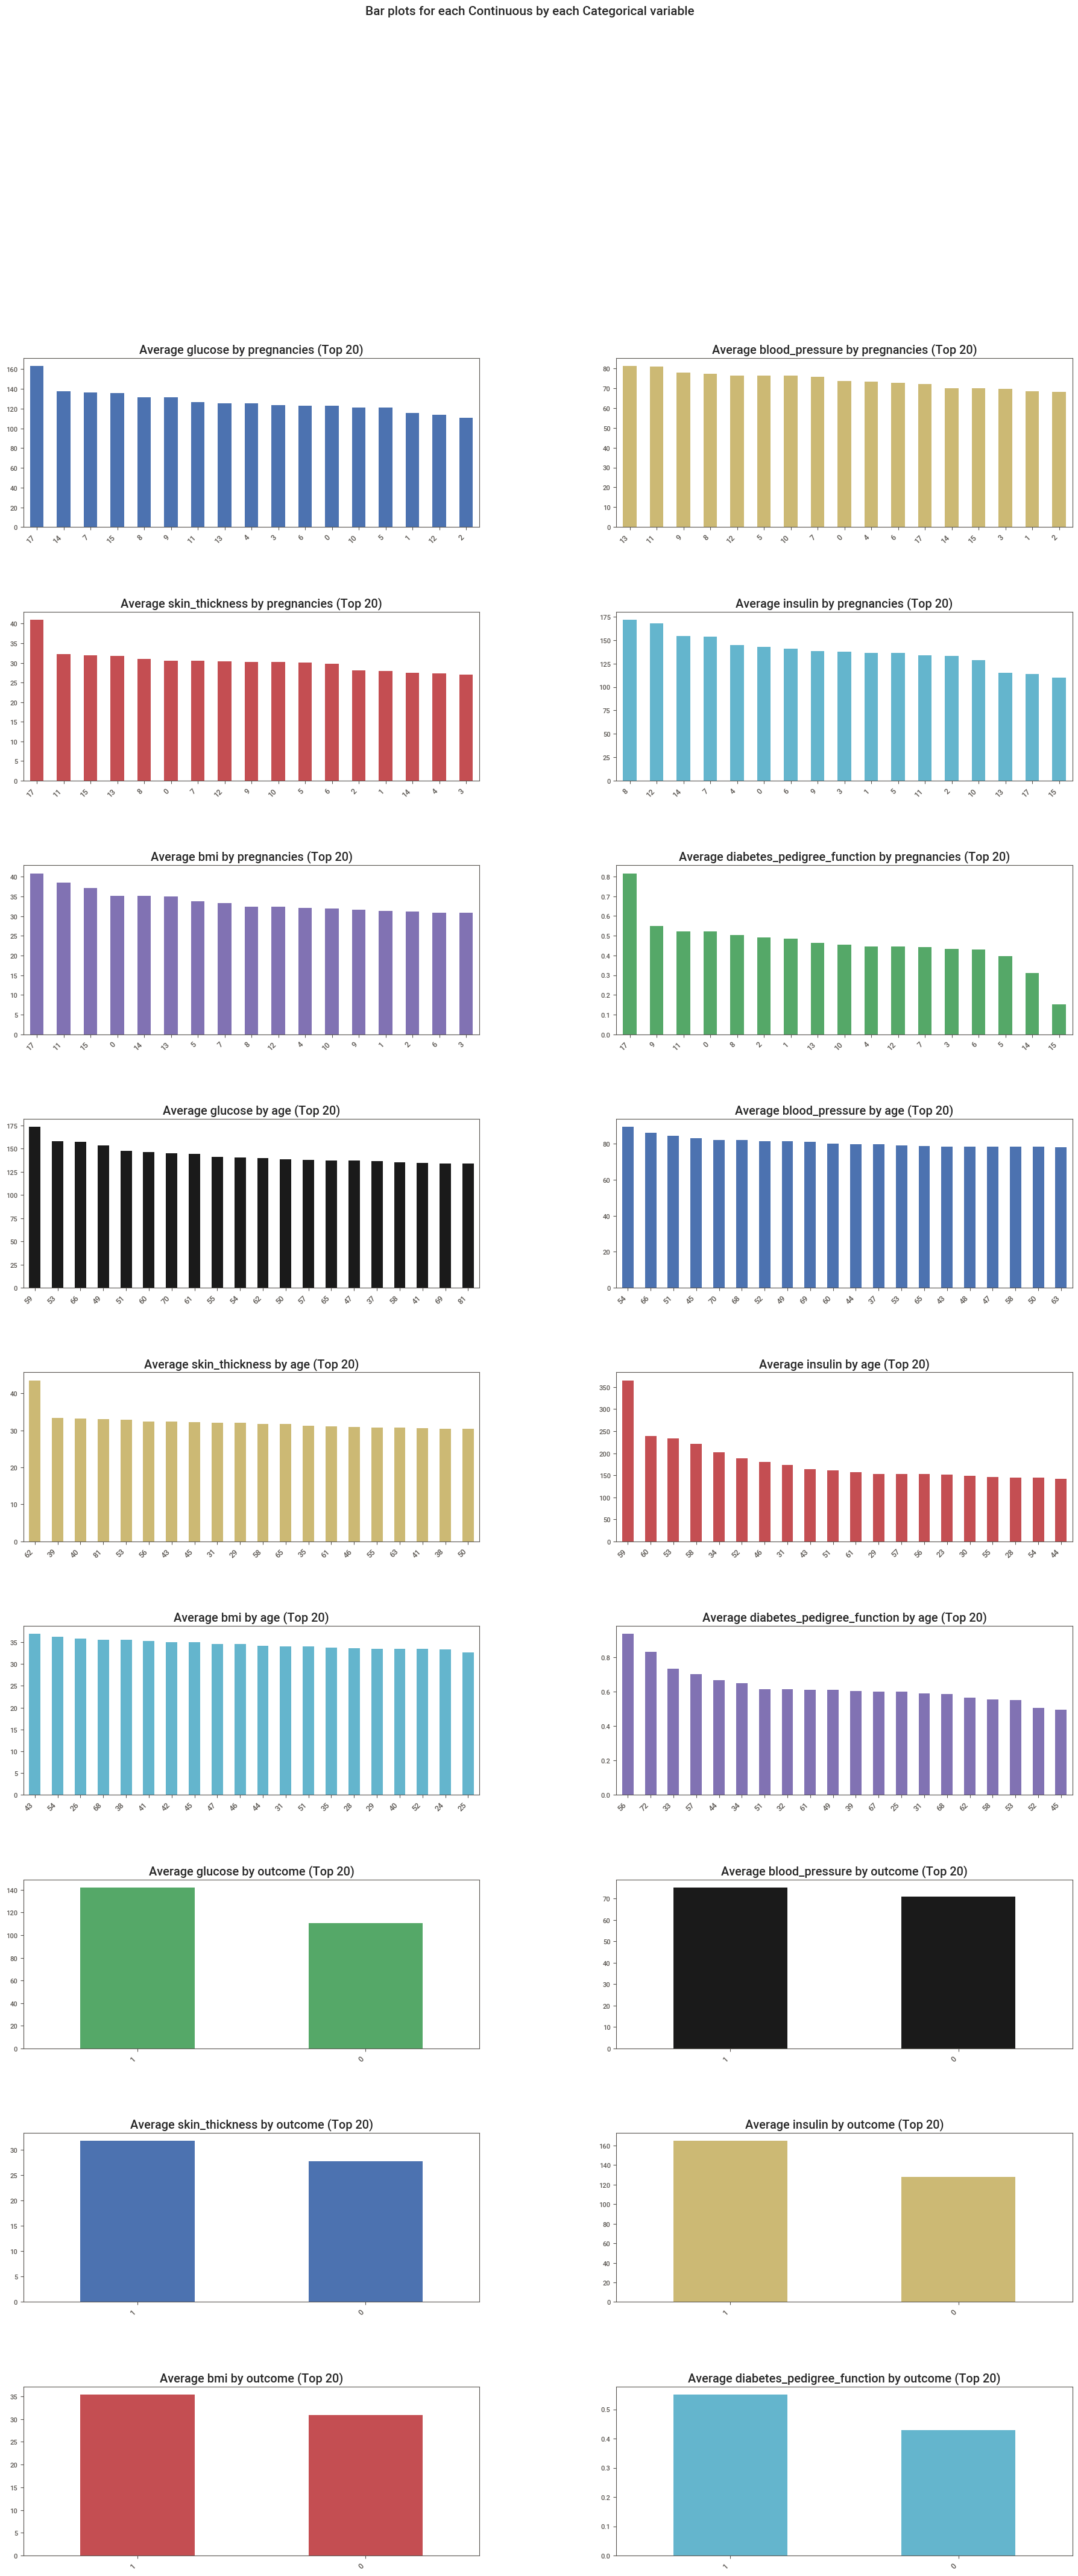

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [13]:
# Generating the AutoViz report
autoviz = AutoViz_Class()
%matplotlib inline
autoviz_report = autoviz.AutoViz(filename='', sep=',', depVar='', dfte=diabetes_df, header=0, verbose=0, lowess=False,
               chart_format='svg', max_rows_analyzed=1500, max_cols_analyzed=30, save_plot_dir=None)

<H2>Feature Engineering using Featuretools</H2>

In [14]:
import featuretools as ft

# Define entityset
es = ft.EntitySet(id='data')

# Add dataframe to entityset
es = es.add_dataframe(
    dataframe_name='data',
    dataframe=diabetes_df,
    index='index'  # Define a unique index
)

# Define features
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='data'
)

print('After selecting features')
num_features = feature_matrix.shape[1]
print(f"Number of features: {num_features}")
print("Column names:", feature_matrix.columns)

After selecting features
Number of features: 9
Column names: Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')


<H3>Visualize Missing Data using missingno</H3>

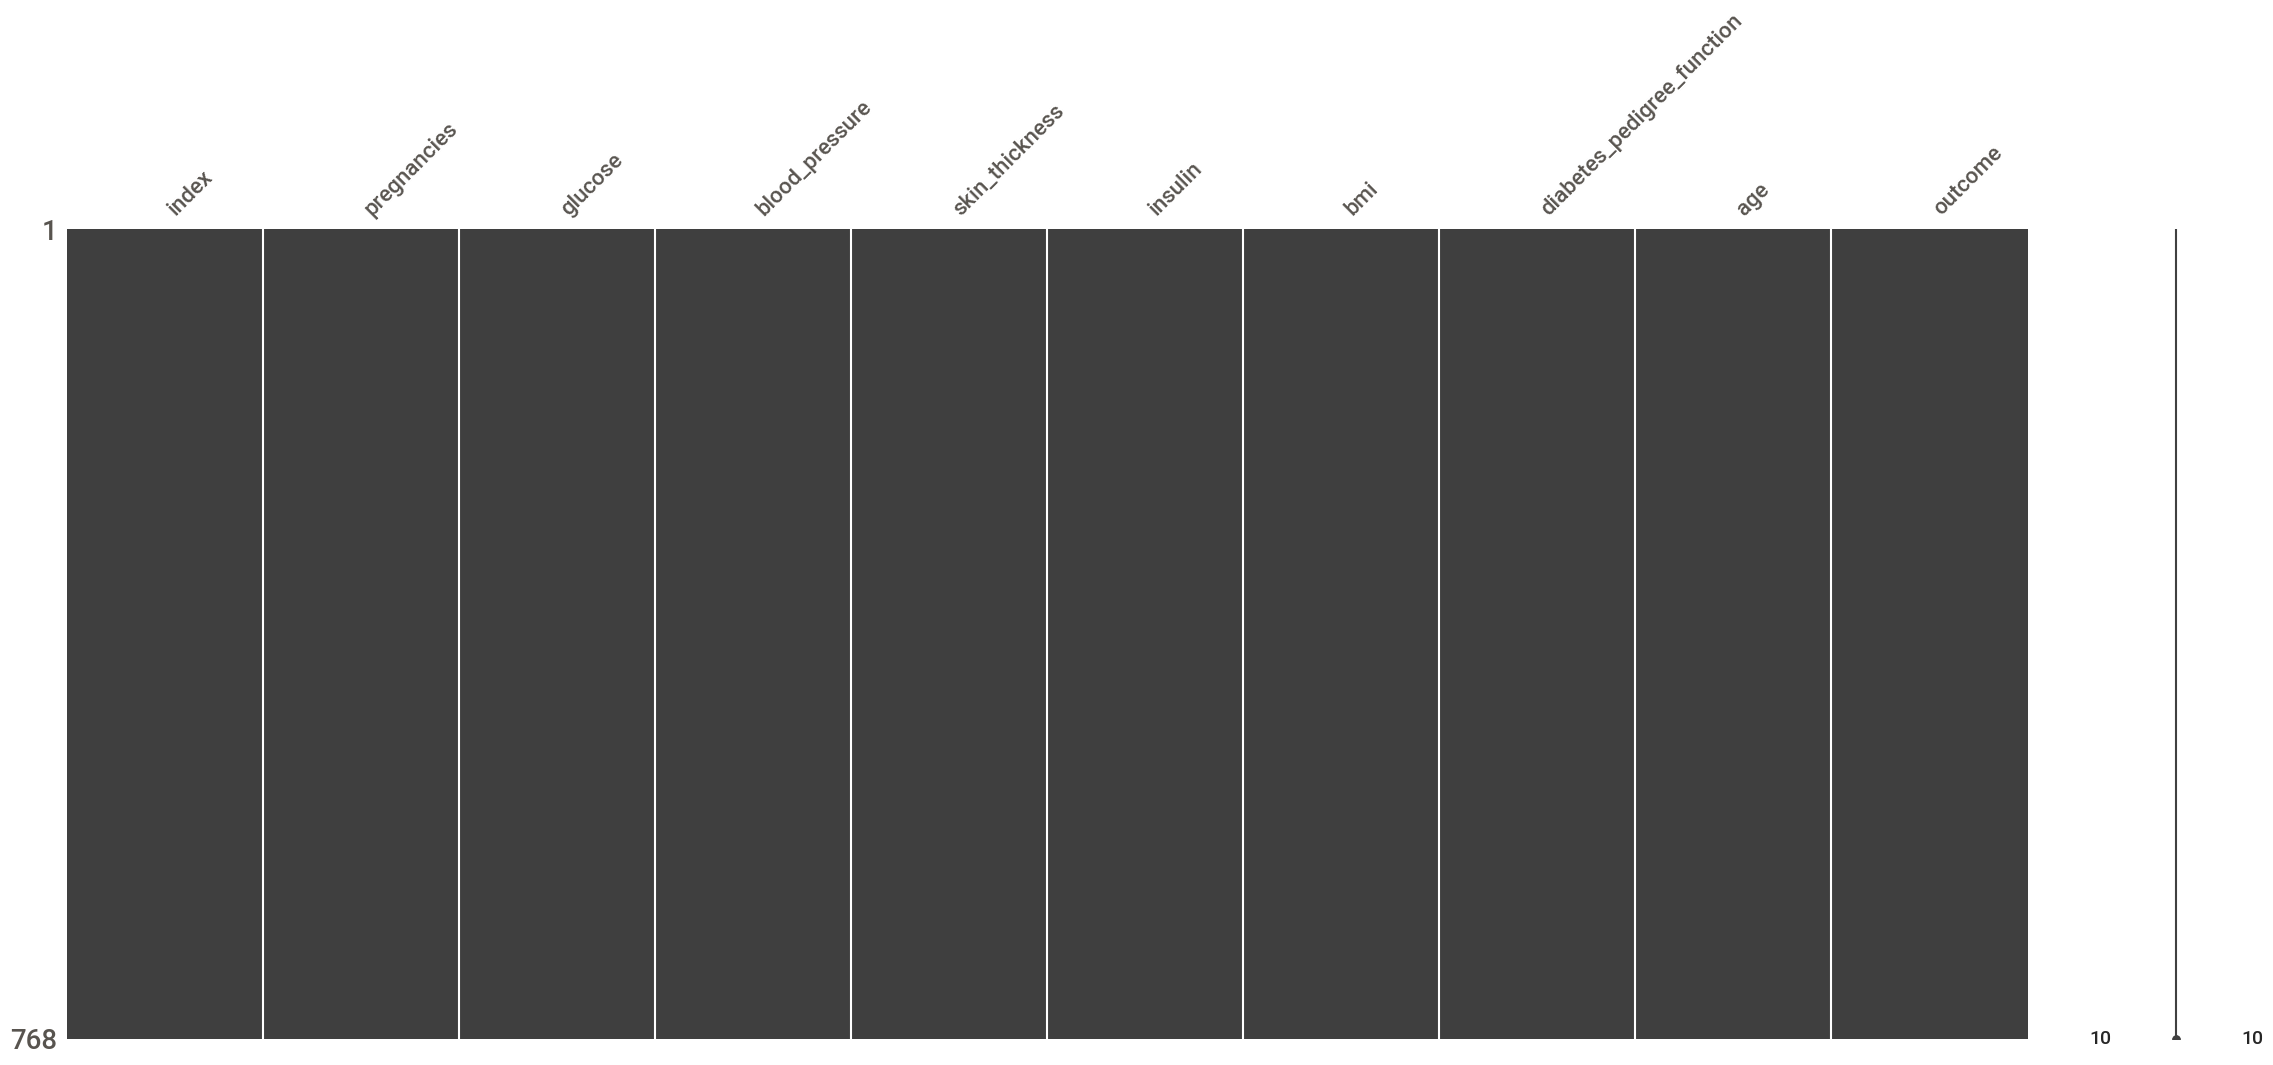

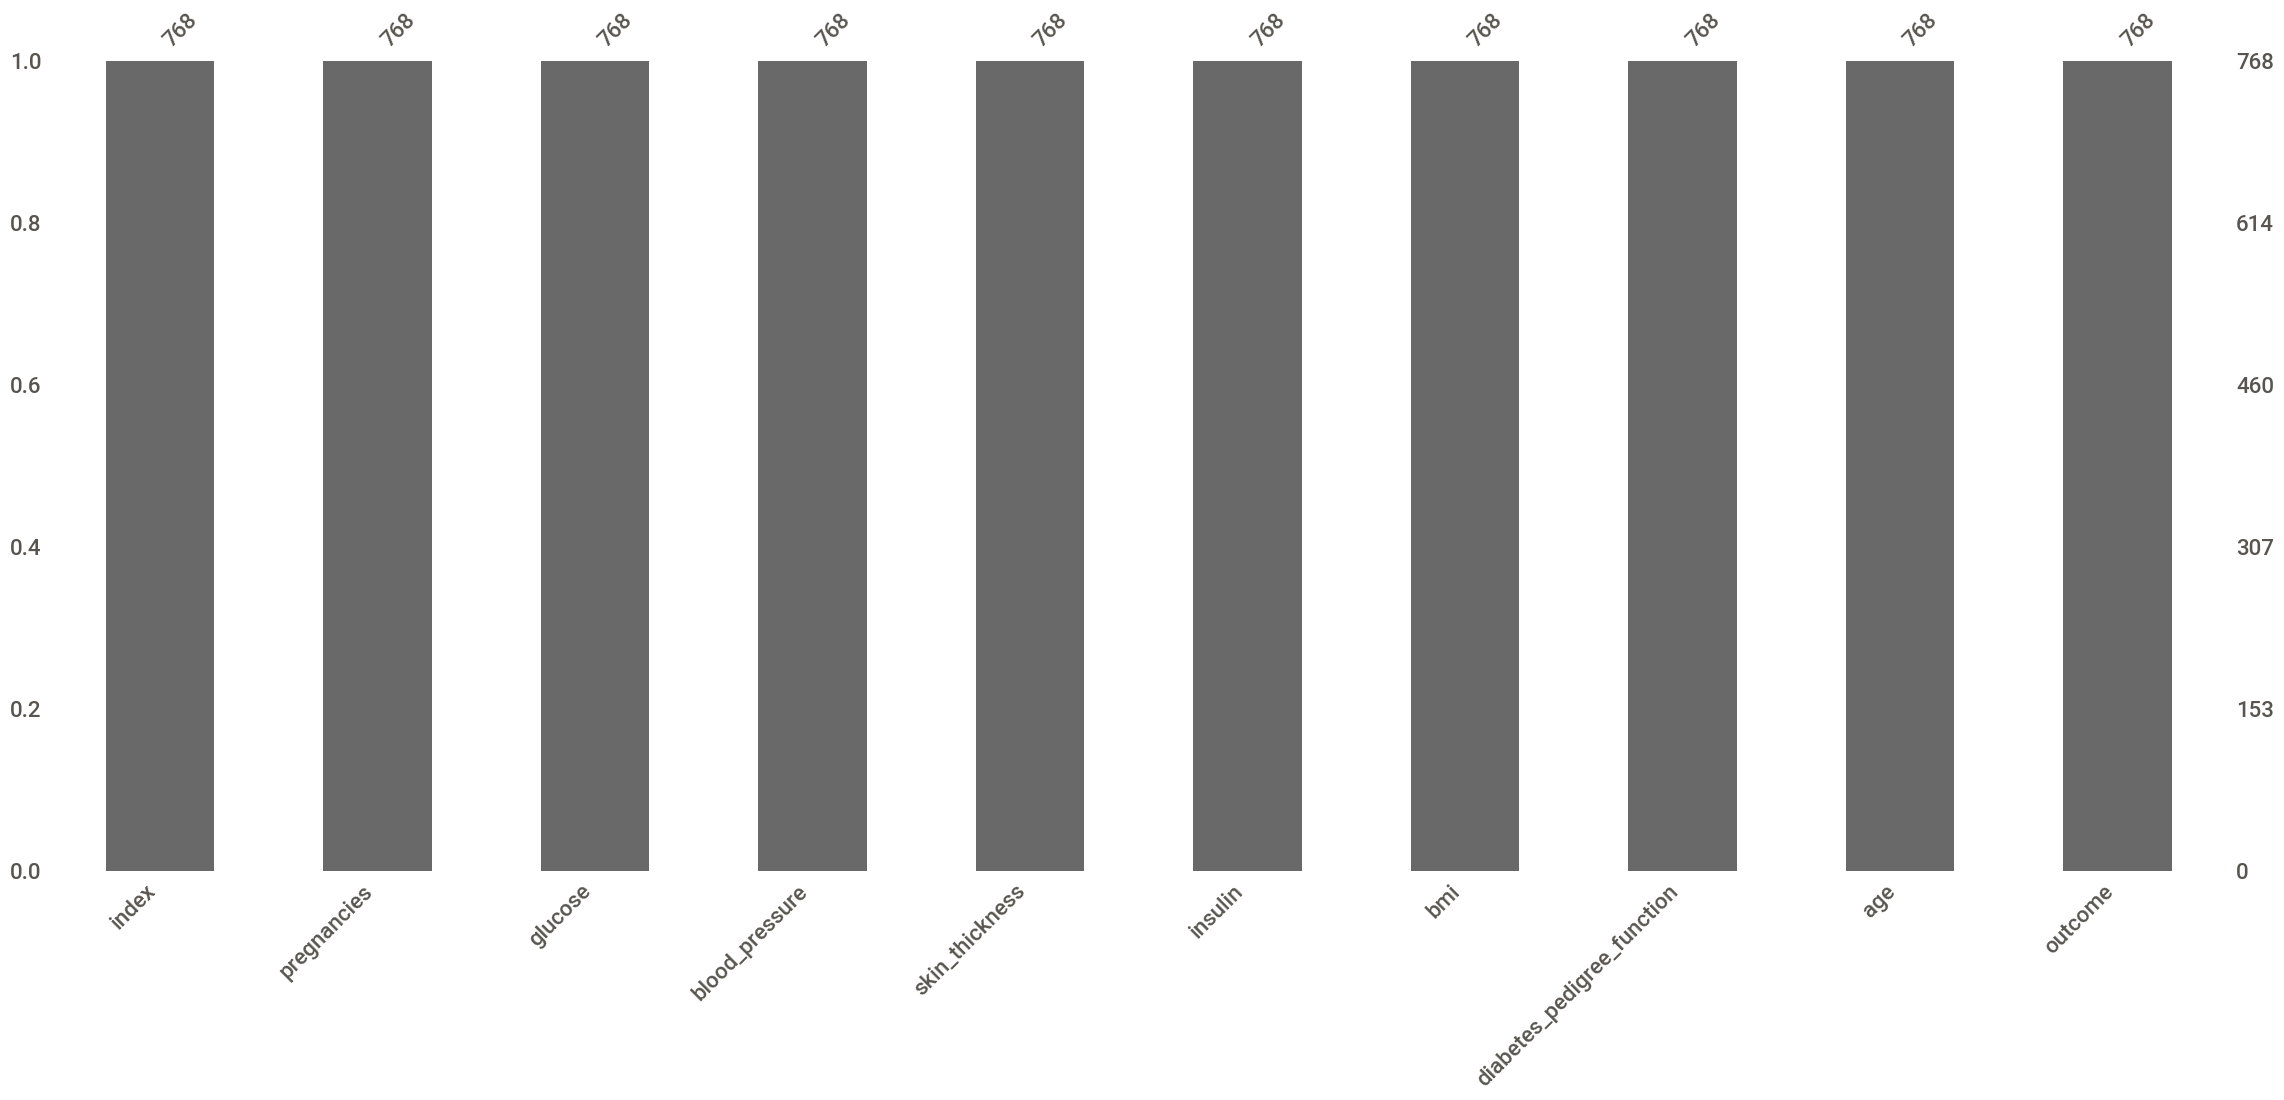

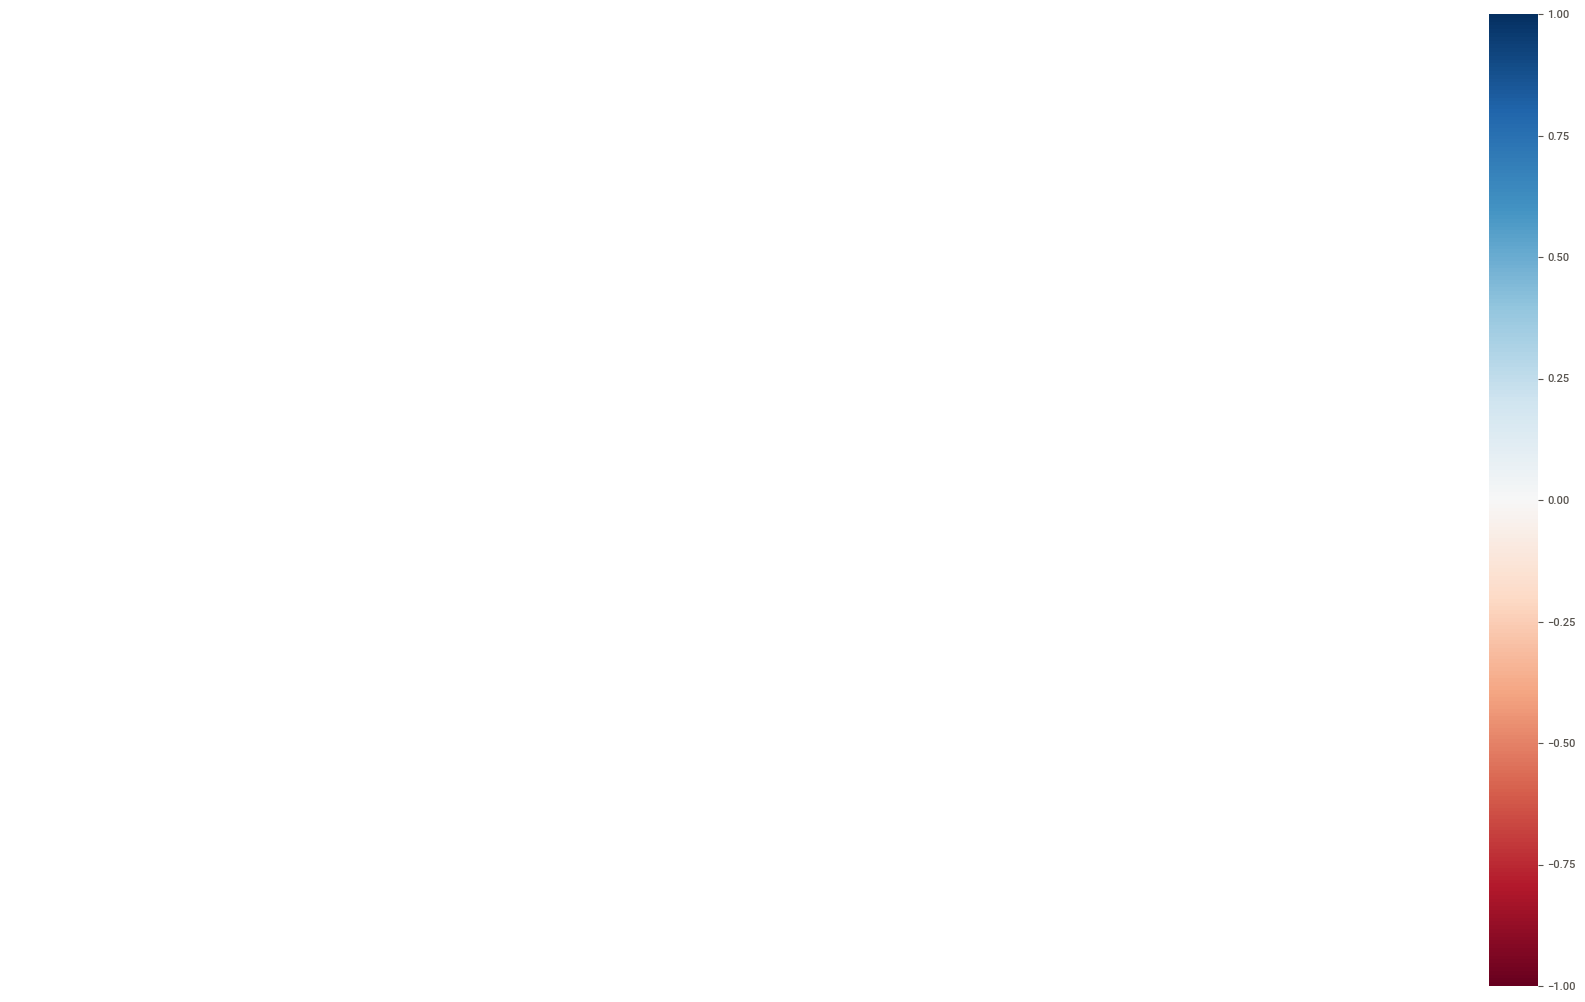

In [15]:
%matplotlib inline

# Visualize missing data
msno.matrix(diabetes_df)
plt.show()

msno.bar(diabetes_df)
plt.show()

msno.heatmap(diabetes_df)
plt.show()

In [16]:
diabetes_df.head()

index  pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0    0         6        148.0        72.0            35.0        125.0   33.6   
1    1         1         85.0        66.0            29.0        125.0   26.6   
2    2         8        183.0        64.0            29.0        125.0   23.3   
3    3         1         89.0        66.0            23.0         94.0   28.1   
4    4         0        137.0        40.0            35.0        168.0   43.1   

   diabetes_pedigree_function  age  outcome  
0             0.627            50      1     
1             0.351            31      0     
2             0.672            32      1     
3             0.167            21      0     
4             2.288            33      1

<H1>Task: Model Selection, Training and Hyperparameter Tuning for Diabetes Dataset</H1>

<H3>H2O AutoML</H3>

In [17]:
# Installing the library
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [18]:

# Importing the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from h2o.automl import H2OAutoML
from h2o.explanation import explain
import h2o
import pandas as pd
import numpy as np
import warnings

In [19]:
# Hide all warnings
warnings.filterwarnings('ignore')

In [20]:
# Initializing H2O cluster
h2o.init()

# Loading the Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
df = pd.read_csv(url, names=column_names)

# Checking for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Replace 0 values with NaN for certain features
zero_not_accepted = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.nan)

# Imputing missing values with median
for column in zero_not_accepted:
    df[column].fillna(df[column].median(), inplace=True)

# Converting to H2OFrame for H2O processing
h2o_df = h2o.H2OFrame(df)

# Splitting dataset into training and test sets
train, test = h2o_df.split_frame(ratios=[.8], seed=123)

# Converting the target column to categorical in H2OFrame
train['outcome'] = train['outcome'].asfactor()
test['outcome'] = test['outcome'].asfactor()

# Defining features and target
target = 'outcome'
features = list(train.columns)
features.remove(target)

# Training the H2O AutoML model
aml = H2OAutoML(max_runtime_secs=60, seed=123, max_models=5)
aml.train(x=features, y=target, training_frame=train)

# Leaderboard view
lb = aml.leaderboard
print("Leaderboard:")
print(lb.head())

# Getting the leader model
leader_model = aml.leader

# Printing the model ID and type
print("Model ID:", leader_model.model_id)
print("Model Type:", leader_model.algo)

# Printing the specific hyperparameters
print("Hyperparameters for the leader model:")
params = leader_model.params
for param, value in params.items():
    print(f"{param}: {value}")

# Printing the detailed model summary
print("Leader Model Summary:")
print(leader_model.summary())

# Making predictions on the test set
predictions = leader_model.predict(test)

# Evaluating the best model
performance = leader_model.model_performance(test)
print(performance)

# Saving the best model
best_model_path = h2o.save_model(model=leader_model, path="./best_diabetes_model", force=True)
print(f"Model saved to: {best_model_path}")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 23+37-2369, mixed mode, sharing)
  Starting server from C:\Users\manis\anaconda3\envs\CAIAssignment21\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\manis\AppData\Local\Temp\tmpyoge2gik
  JVM stdout: C:\Users\manis\AppData\Local\Temp\tmpyoge2gik\h2o_manis_started_from_python.out
  JVM stderr: C:\Users\manis\AppData\Local\Temp\tmpyoge2gik\h2o_manis_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.5
H2O_cluster_version_age:    26 days
H2O_cluster_name:           H2O_from_python_manis_71hfe8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    15.77 Gb
H2O_cluster_total_cores:    32
H2O_cluster_allowed_cores:  32
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.14 final
--------------------------  -----------------------------

Missing values in each column:
pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:16:13.274: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Leaderboard:
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20240924_221613     0.845825   0.459673  0.724099                0.233751  0.387529  0.150179
GLM_1_AutoML_1_20240924_221613                           0.844965   0.458449  0.733648                0.235343  0.387601  0.150234
StackedEn

<H2>Explainable Model using H2O tools</H2>

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240924_221613

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32807776772900576
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      75   29   0.2788   (29.0/104.0)
1      10   51   0.1639   (10.0/61.0)
Total  85   80   0.2364   (39.0/165.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

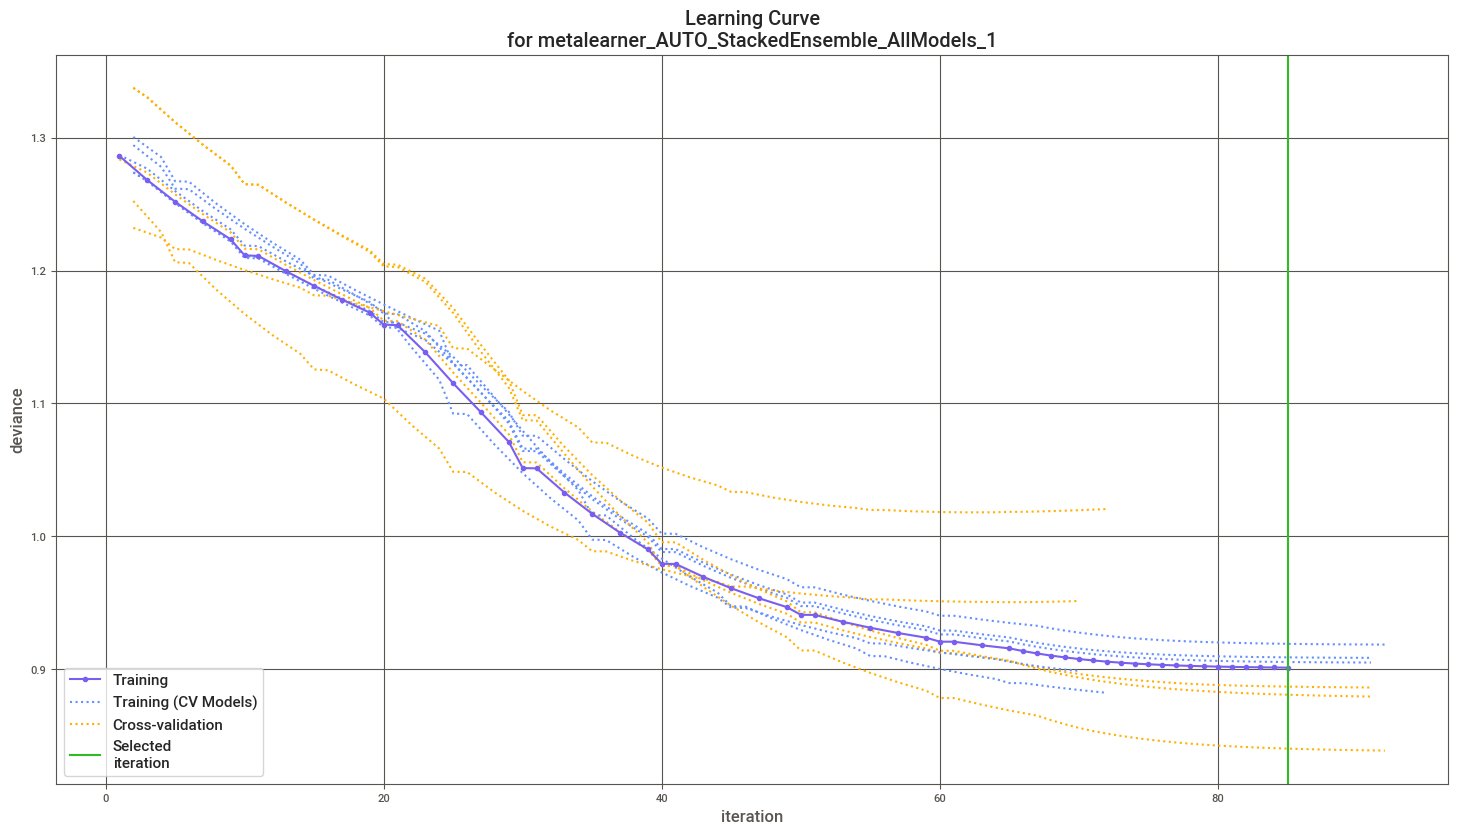

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

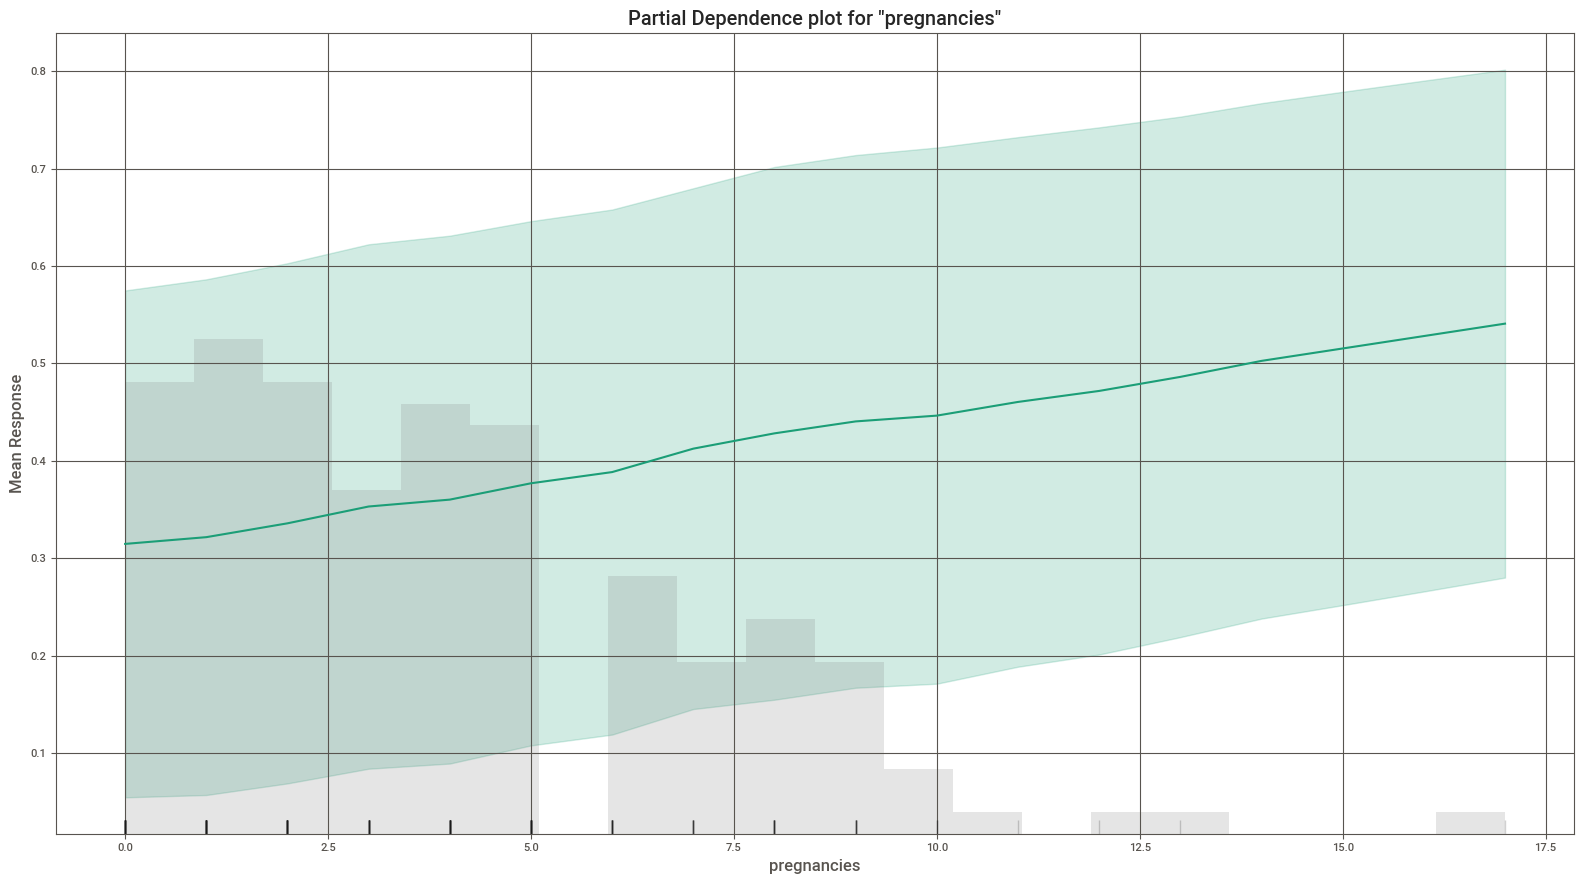

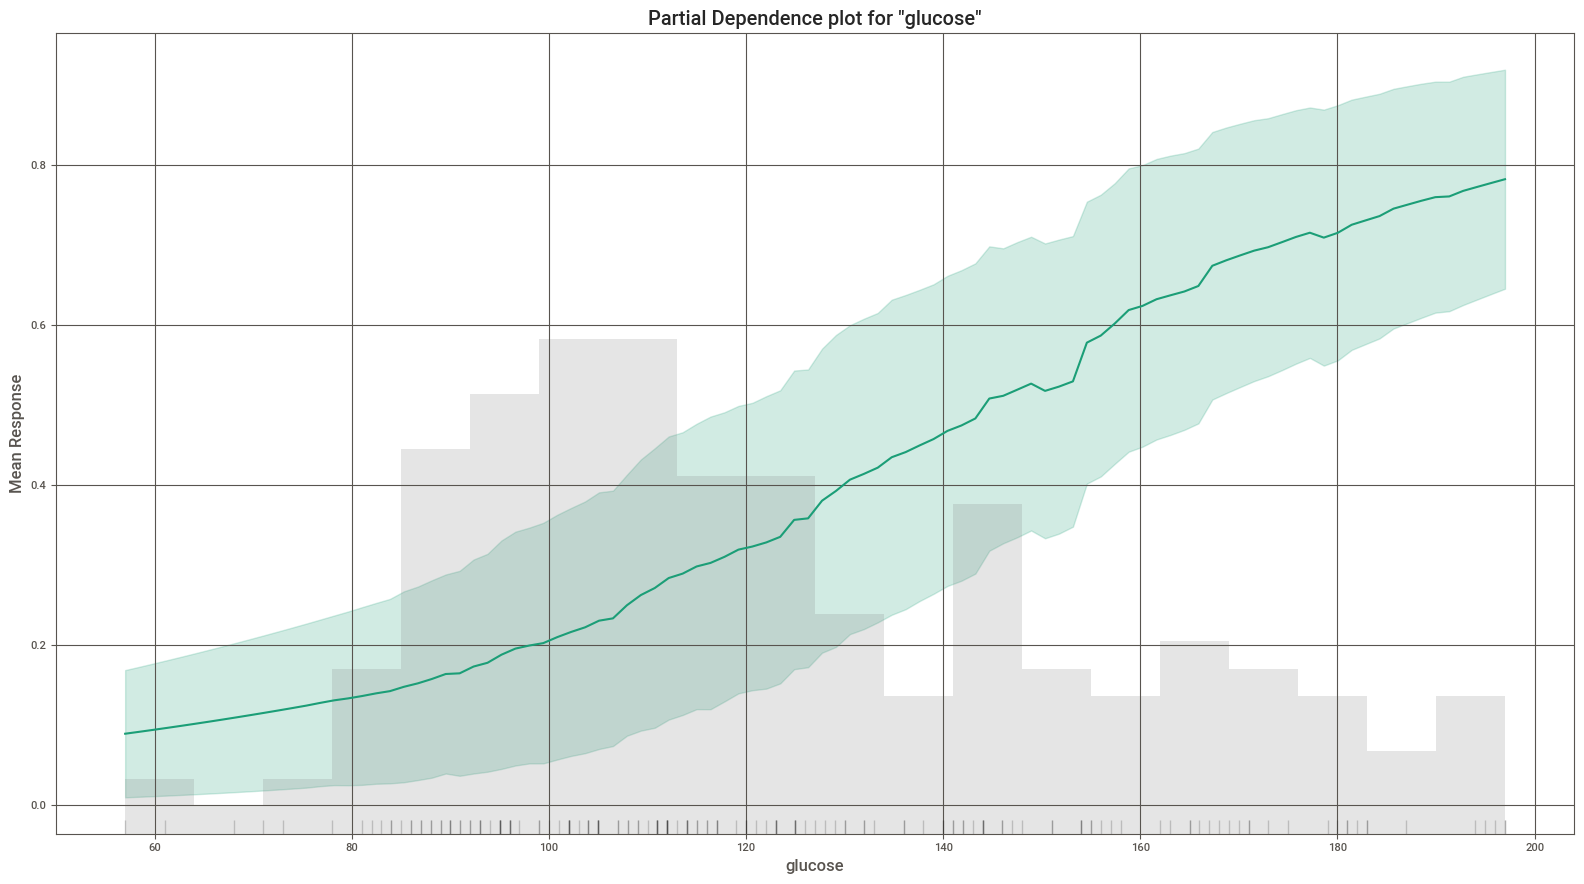

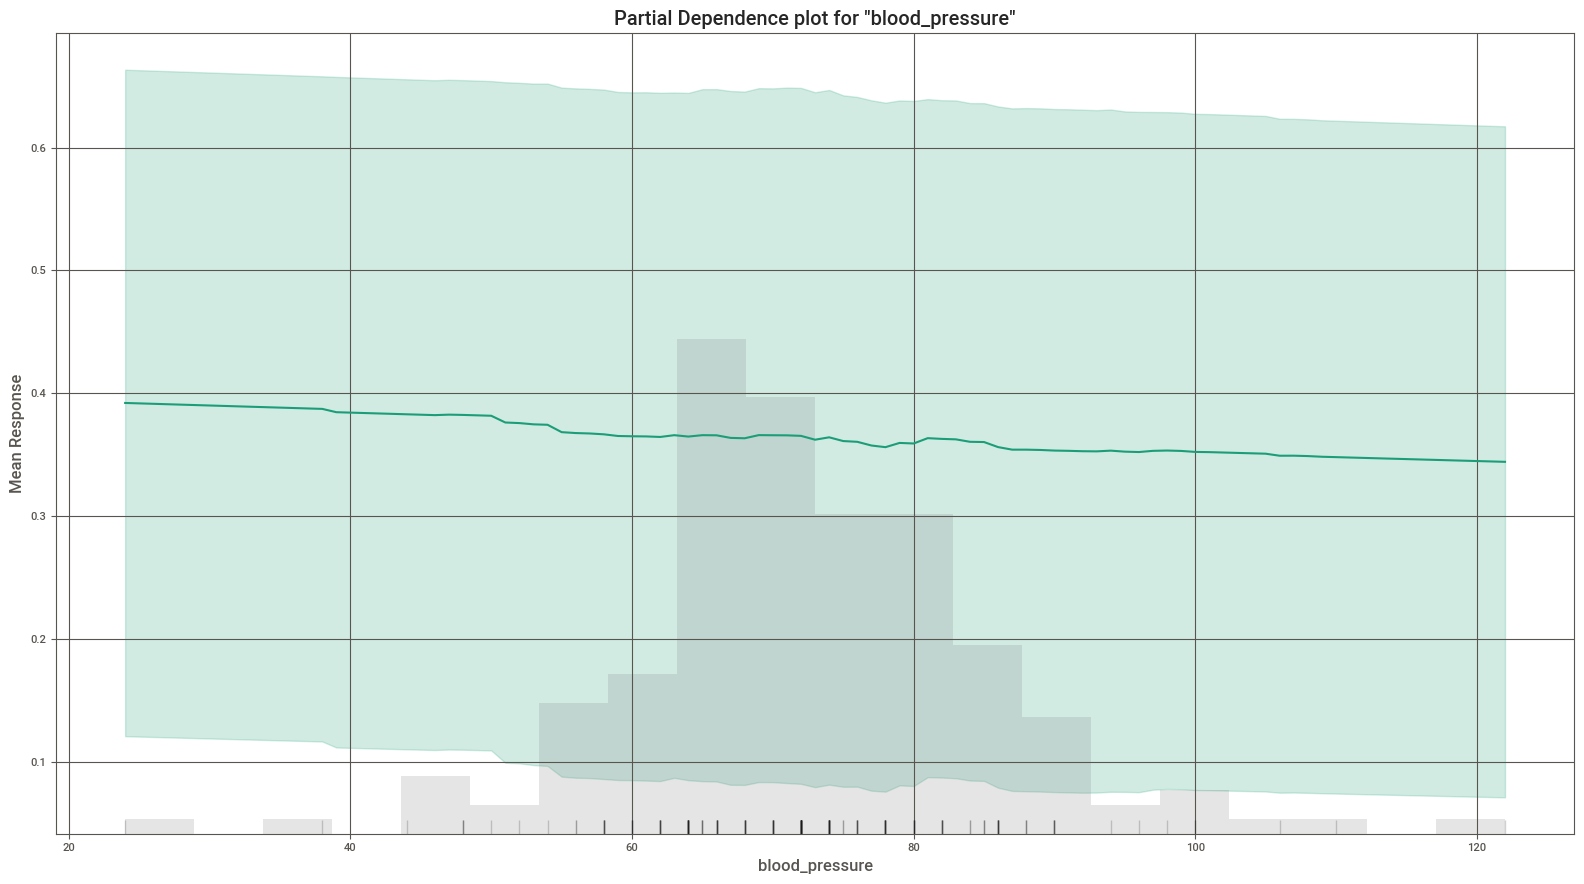

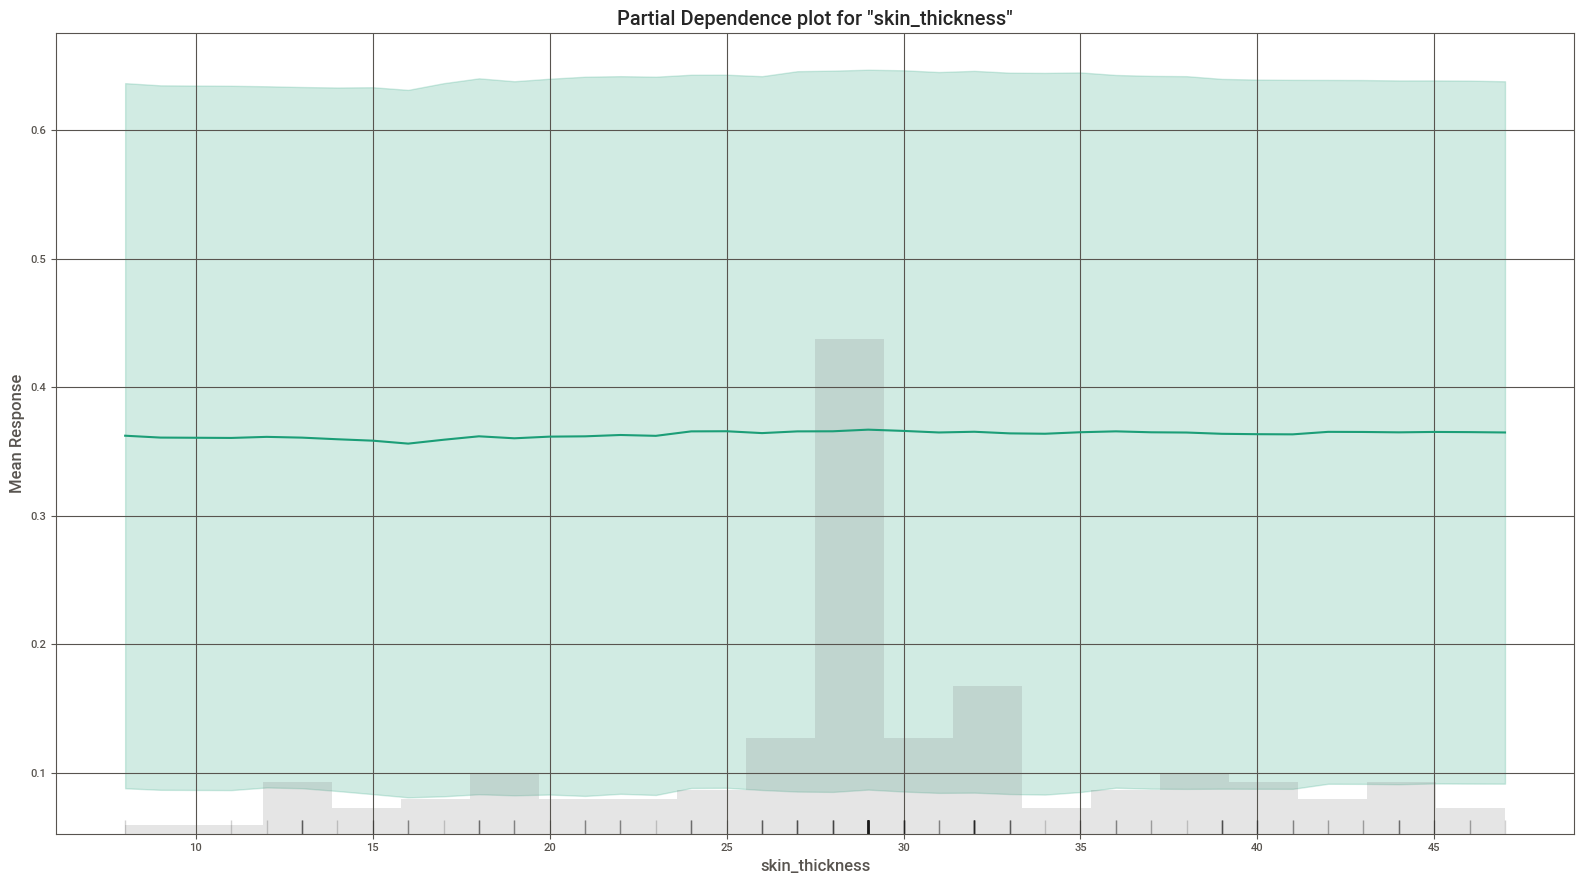

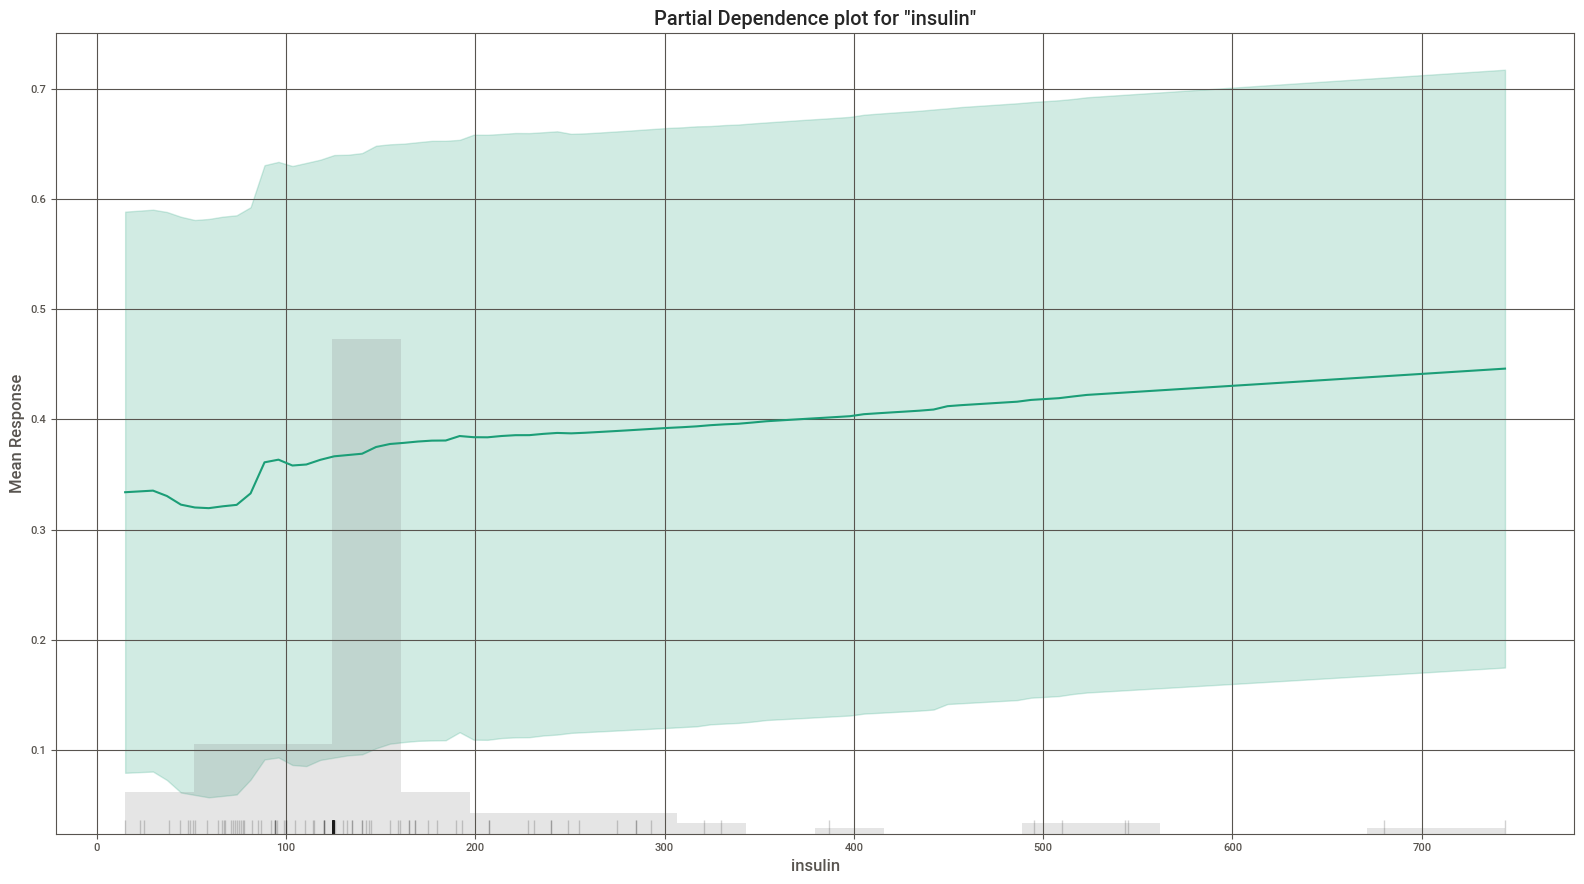

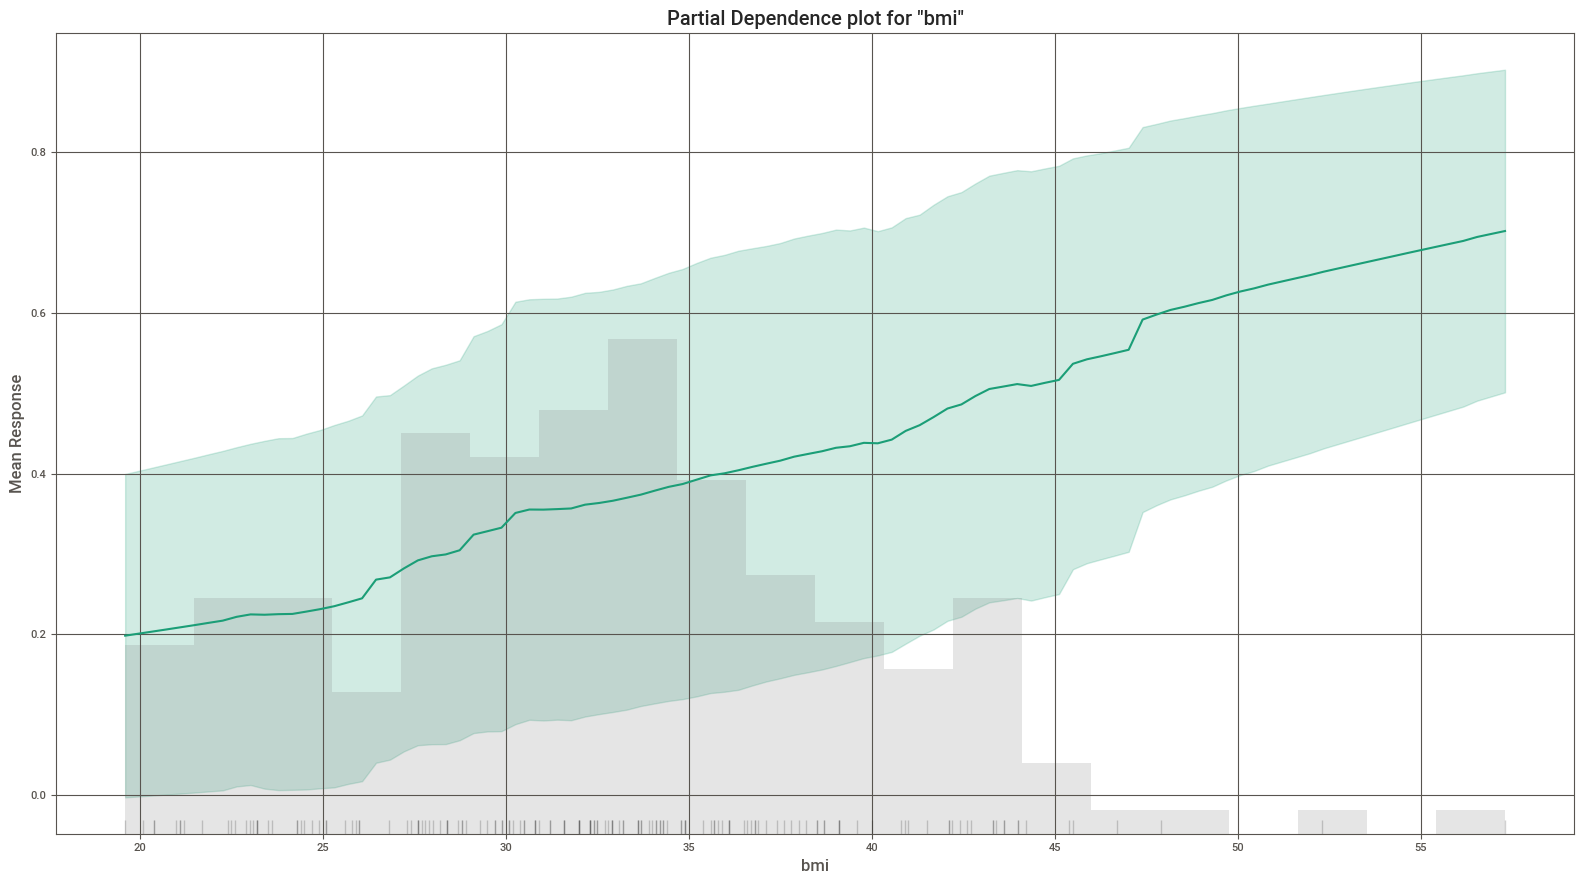

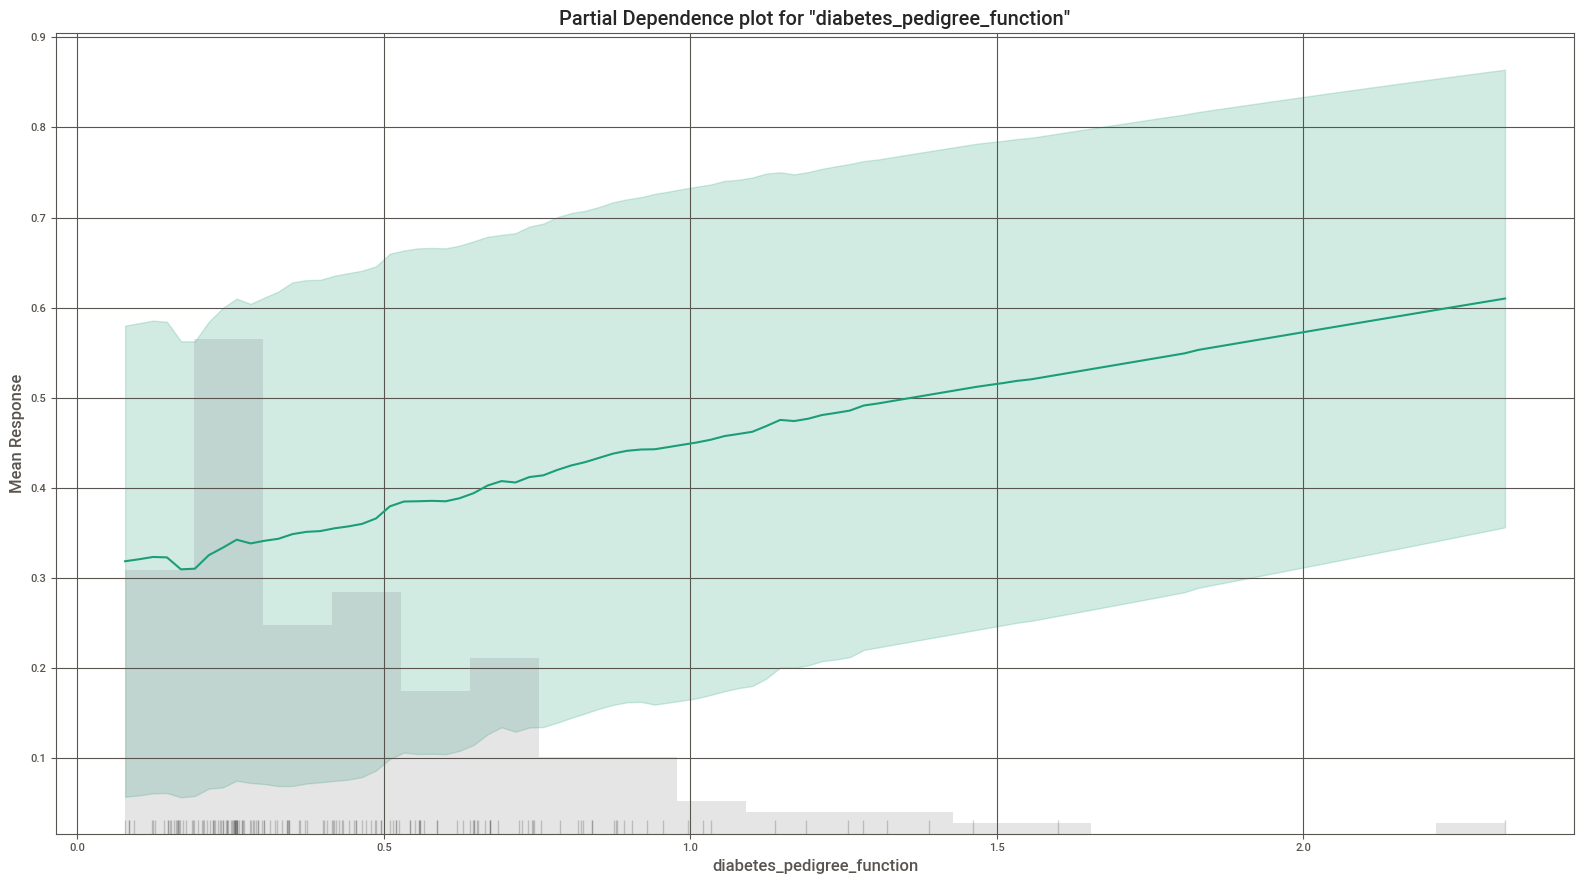

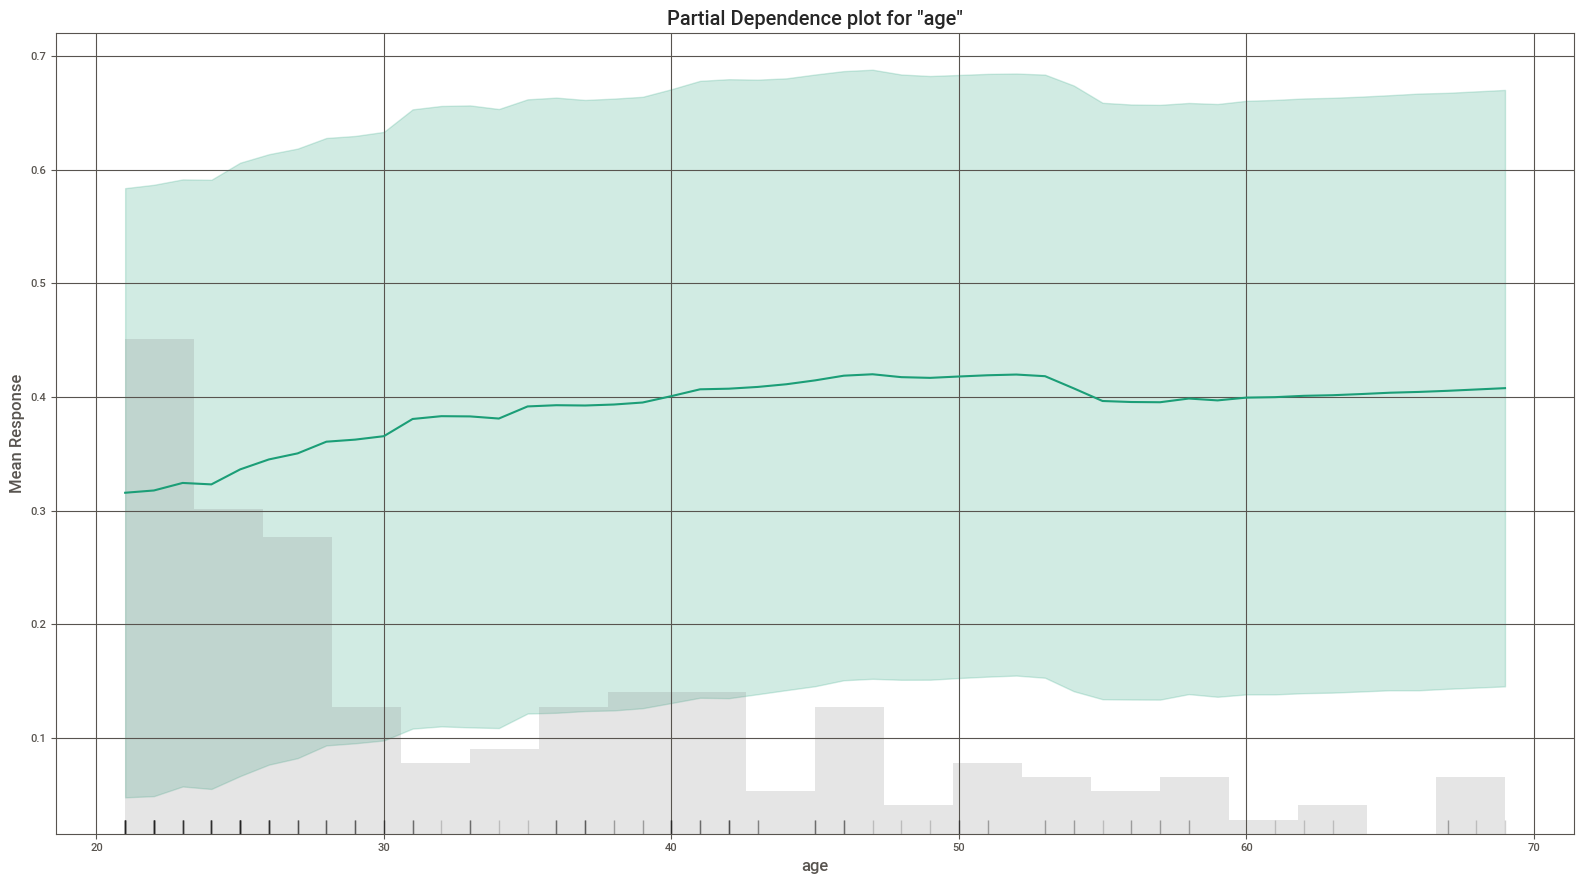



H2OExplanation([('confusion_matrix', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x00000242DC4191E0>), ('description', <h2o.explanation._explain.Description object at 0x00000242E109CC40>), ('subexplanations', H2OExplanation([('StackedEnsemble_AllModels_1_AutoML_1_20240924_221613', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x00000242DE8B0C70>), ('plots', H2OExplanation([('StackedEnsemble_AllModels_1_AutoML_1_20240924_221613', ConfusionMatrix({'table': H2OTwoDimTable({'_table_header': 'Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32807776772900576', '_col_header': ['', '0', '1', 'Error', 'Rate']})}))]))]))]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x00000242DC703F70>), ('description', <h2o.explanation._explain.Description object at 0x00000242DE8B0A00>), ('plots', H2OExplanation([('StackedEnsemble_AllModels_1_AutoML_1_20240924_221613', <h2o.plot._plot_result._MObject obj

In [21]:
# Explaining model using H2O's built-in tools
explanations = explain(leader_model, test)
print(explanations)

In [22]:
# Loading the saved model
loaded_model = h2o.load_model(best_model_path)

# Making predictions with the loaded model
predictions = loaded_model.predict(test)

# Converting to pandas DataFrame
predictions_df = predictions.as_data_frame()

# Assuming the prediction column is named 'predict'
predictions_df['predicted_class'] = (predictions_df['p1'] >= 0.5).astype(int)

# Showing predictions
print(predictions_df.head())

# Separating true labels
true_labels = test[target].as_data_frame()
true_labels_df = true_labels.values.ravel()

# Calculate accuracy
accuracy = accuracy_score(true_labels_df, predictions_df['predicted_class'])
print(f'Accuracy: {accuracy}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels_df, predictions_df['predicted_class'])
print('Confusion Matrix:')
print(conf_matrix)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
   predict     p0        p1     predicted_class
0     1     0.180699  0.819301         1       
1     1     0.589277  0.410723         0       
2     1     0.397333  0.602667         1       
3     0     0.951857  0.048143         0       
4     1     0.564928  0.435072         0       
Accuracy: 0.7393939393939394
Confusion Matrix:
[[89 15]
 [28 33]]


<H2>Evaluating the Model</H2>

In [23]:
# Calculate accuracy
accuracy = accuracy_score(true_labels_df, predictions_df['predicted_class'])
print(f'Accuracy: {accuracy}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels_df, predictions_df['predicted_class'])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7393939393939394
Confusion Matrix:
[[89 15]
 [28 33]]


In [47]:
# Shutdown the H2O cluster
h2o.shutdown()

H2O session _sid_8625 closed.


<H1>Task: Explainable AI (XAI) Implementation for Diabetes Dataset</H1>

In [24]:
# Installing the libraries
!pip install lime
!pip install anchor-exp
!pip install pdpbox
!pip install pdpbox
!pip install PyALE

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 1.3/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 2.1/124.9 MB 4.2 MB/s eta 0:00:30
   - -------------------------------------- 3.4/124.9 MB 4.8 MB/s eta 0:00:26
   - -------------------------------------- 5.2/124.9 MB 5.5 MB/s eta 0:00:22
   -- ------------------------------------- 6.8/124.9 MB 6.1 MB/s eta 0:00:20
   -- ------------------------------------- 9.2/124.9 MB 6.7 MB/s eta 0:00:18
   --- ------------------------------------ 11.8/124.9 MB 7.5 MB/s eta 0:00:16
   ---- ----------------------------------- 14.9/124.9 MB 8.5 MB/s eta 0:00:13
   ---

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.905 requires xgboost<1.7,>=0.82, but you have xgboost 2.1.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [25]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from anchor import anchor_tabular
from anchor import anchor_tabular
from pdpbox import pdp
from PyALE import ale
from pdpbox import pdp
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

<H1>Implementing LIME</H1>

# LIME: Local Interpretable Model-agnostic Explanations.

<H2>Loading the Diabetes dataset</H2>

In [26]:
# Loading the Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
df = pd.read_csv(url, names=column_names)

<H2>Preprocessing the Data</H2>

In [27]:
# Replace 0 values with NaN for certain features
zero_not_accepted = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.nan)

# Imputing missing values with median
for column in zero_not_accepted:
    df[column].fillna(df[column].median(), inplace=True)

# Checking for NaN values
if df.isnull().sum().any():
    print("Data contains NaN values. Filling NaN values...")
    df.fillna(method='ffill', inplace=True)

# No need for encoding as all features are numerical in this dataset

# Defining the features and target
X = df.drop(columns=['outcome'])  # Drop 'outcome' (dependent variable)
y = df['outcome']  # 'outcome' is the dependent variable (presence of diabetes)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<H2>Training a model using Random Forest</H2>

In [28]:
# Training Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<H2>Creating a LIME Explainer</H2>

In [29]:
# Creating a LIME Explainer
lime_explainer = LimeTabularExplainer(X_train.values, 
                                      feature_names=X_train.columns, 
                                      class_names=['No Diabetes', 'Diabetes'],
                                      mode='classification')

In [30]:
# Selecting an Instance to Explain
instance = X_test.iloc[5]  # Change the index to select different instances

In [31]:
# Generating the Explanation
exp = lime_explainer.explain_instance(instance.values, model.predict_proba, num_features=8)

### If you're not in a Jupyter notebook, you can use the following to save the explanation as an HTML file:

In [32]:
# Explanation Display
exp.show_in_notebook(show_table=True)
exp.save_to_file('diabetes_lime_explanation.html')

In [33]:
# Print feature importances for this instance
print("\nFeature importances for this instance:")
for feature, importance in exp.as_list():
    print(f"{feature}: {importance}")


Feature importances for this instance:
age > 40.00: 0.11902477712296315
bmi > 36.38: 0.10559407748346268
100.00 < glucose <= 117.00: -0.09253983545876131
insulin > 129.75: 0.025477406331946492
64.00 < blood_pressure <= 72.00: 0.015406489683079908
29.00 < skin_thickness <= 32.00: 0.01490296113605346
0.24 < diabetes_pedigree_function <= 0.37: -0.011361647696196495
3.00 < pregnancies <= 6.00: -0.00241708231033229


<H2>Implementing Anchors</H2>

In [34]:
# Creating an Anchor Explainer
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    class_names=['No Diabetes', 'Diabetes'],
    feature_names=X_train.columns,
    train_data=X_train.values,
    categorical_names={}
)

In [35]:
# Generating Anchor Explanation
anchor_exp = anchor_explainer.explain_instance(instance.values, model.predict, threshold=0.95)

print("\nAnchor Explanation:")
print('Anchor: %s' % (' AND '.join(anchor_exp.names())))
print('Precision: %.2f' % anchor_exp.precision())
print('Coverage: %.2f' % anchor_exp.coverage())



Anchor Explanation:
Anchor: age > 40.00 AND insulin > 129.75 AND bmi > 36.38 AND diabetes_pedigree_function > 0.24 AND 100.00 < glucose <= 117.00 AND blood_pressure <= 72.00 AND skin_thickness > 24.00
Precision: 0.97
Coverage: 0.00


<H2>Implementing Partial Dependence Plots (PDPs)</H2>

In [36]:
#def plot_pdp(model, X, feature):
 #   pdp_isolate = pdp.pdp_isolate(model=model, dataset=X, model_features=X.columns, feature=feature)
 #   pdp.pdp_plot(pdp_isolate, feature)
  #  plt.show()

def plot_pdp(model, X, features):
    fig, ax = plt.subplots(figsize=(10, 6))
    PartialDependenceDisplay.from_estimator(model, X, features, ax=ax)
    plt.show()

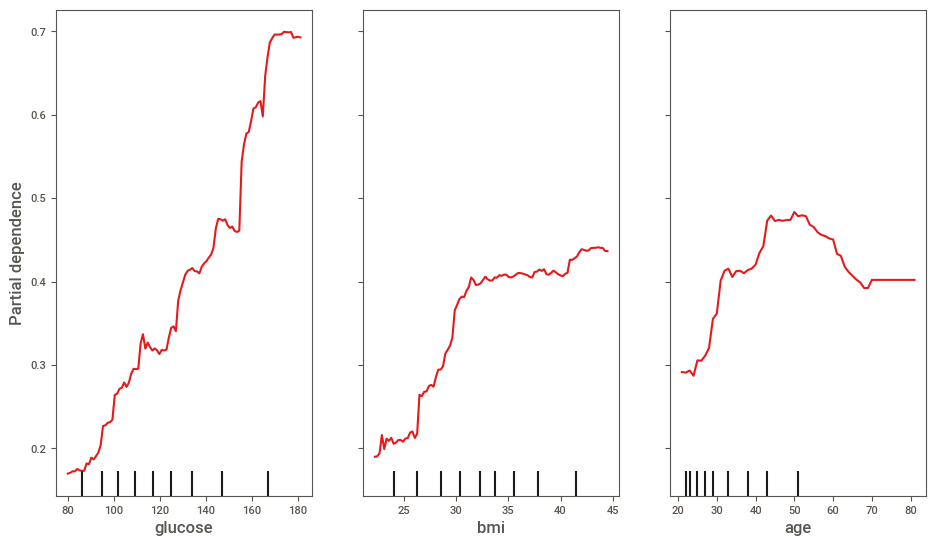

In [37]:
# Generate PDPs for a few important features
important_features = ['glucose', 'bmi', 'age']
plot_pdp(model, X, important_features)

<H2>Implementing Accumulated Local Effects (ALE) Plots</H2>

In [38]:
def plot_ale(model, X, feature):
    ale_eff = ale(
        X=X,
        model=model,
        feature=[feature],
        plot=True,
        grid_size=50,
        include_CI=True,
#        fig_kw={'figsize': (10, 6)}
    )
    plt.show()



PyALE._ALE_generic:INFO: Continuous feature detected.


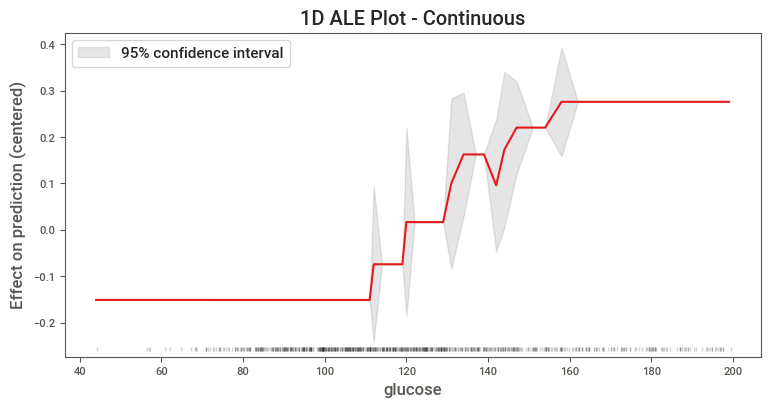

PyALE._ALE_generic:INFO: Continuous feature detected.


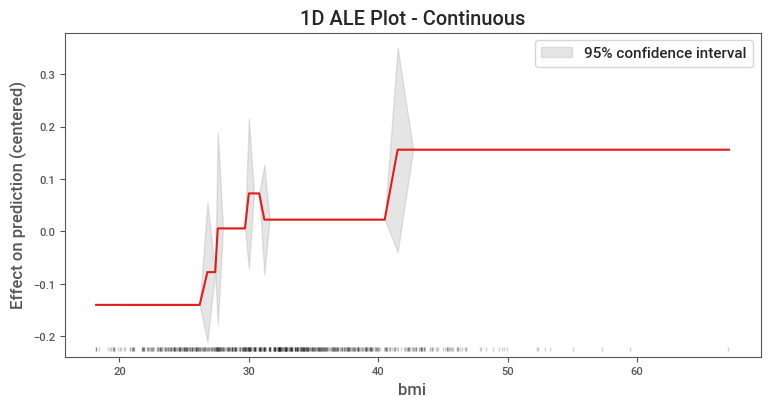

PyALE._ALE_generic:INFO: Continuous feature detected.


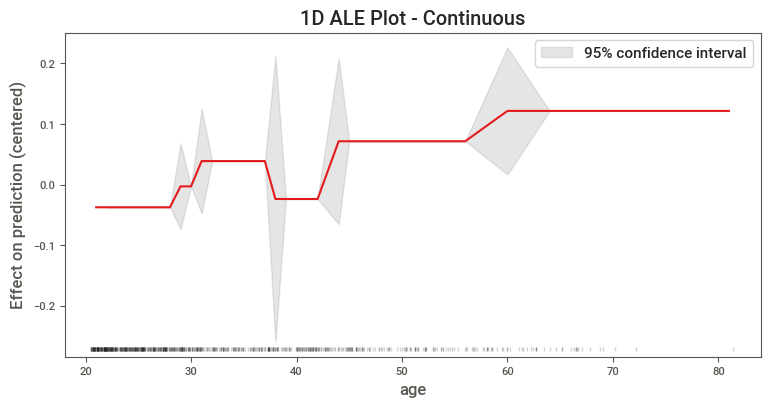

In [39]:
# Generate ALE plots for the same important features
for feature in important_features:
    plot_ale(model, X, feature)


In [40]:
# Print model prediction for this instance
prediction = model.predict(instance.values.reshape(1, -1))[0]
print(f"\nModel prediction for this instance: {'Diabetes' if prediction == 1 else 'No Diabetes'}")



Model prediction for this instance: Diabetes


In [41]:
# Print actual outcome for this instance
actual = y_test.iloc[5]
print(f"Actual outcome for this instance: {'Diabetes' if actual == 1 else 'No Diabetes'}")

Actual outcome for this instance: No Diabetes


<H2>Creating a model as a pickle file for Diabetes Prediction</H2>

In [42]:
!pip cache purge
!pip install scikit-learn==1.3.0


ERROR: pip cache commands can not function since cache is disabled.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [43]:
import pandas as pd
import numpy as np
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<H2> Creating and Saving the model as pickle file</H2>

In [44]:

# Function to load and preprocess data
def load_and_preprocess_data(url):
    column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
    data = pd.read_csv(url, names=column_names)
    
    # Replace 0 values with NaN for certain features
    zero_not_accepted = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']
    for column in zero_not_accepted:
        data[column] = data[column].replace(0, np.nan)
    
    # Impute missing values with median
    for column in zero_not_accepted:
        data[column].fillna(data[column].median(), inplace=True)
    
    return data

# Loading and preprocess the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = load_and_preprocess_data(url)

# Preparing the feature and target variables
X = data.drop(columns=['outcome'])
y = data['outcome']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Saving the model and scaler
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved as 'diabetes_model.pkl' and 'diabetes_scaler.pkl'")

Model and scaler saved as 'diabetes_model.pkl' and 'diabetes_scaler.pkl'


<H2>Model Prediction</H2>

In [45]:

# Loading the model and making predictions
with open('diabetes_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(X_test_scaled)
comparison = (predictions == y_test.values)

# Creating DataFrame for displaying results
df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
df['Prediction'] = predictions
df['Actual'] = y_test.values
df['Correct'] = comparison

print(df.head(15))

    pregnancies   glucose  blood_pressure  skin_thickness   insulin     bmi    \
0    0.681856   -0.791466    -1.177033        0.510202     0.561935  0.237865   
1   -0.526397   -0.326051     0.229156        0.391226    -0.175620  0.483180   
2   -0.526397   -0.459026    -0.680731        0.034298    -0.175620 -0.223904   
3    1.285983   -0.492270     0.642740        0.034298    -0.175620 -1.118582   
4    0.983919    0.471804     1.469910        0.034298    -0.175620 -0.353777   
5    0.681856   -0.625246    -0.018995        0.391226     0.561935  0.771785   
6   -0.828460   -1.689053    -2.004202       -1.274439    -0.731622 -1.724654   
7   -1.130523   -0.159831    -0.018995        0.034298    -0.175620  0.209004   
8    0.077730    1.070196    -0.018995        0.034298    -0.164273 -0.151753   
9    0.379793    0.837488     0.477306        0.034298    -0.175620  0.194574   
10   1.890109   -0.359295    -0.184429       -0.203654    -0.175620 -0.700104   
11   0.983919    1.901294   

<H2>Model Evaluation</H2>

In [46]:

# Evaluating the model
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

class_report = classification_report(y_test, predictions, target_names=['No Diabetes', 'Diabetes'])
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[78 21]
 [20 35]]
Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.79      0.79        99
    Diabetes       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

